In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
#import kagglehub
#engahmedelzoz_bank_marketing_full_addition_path = kagglehub.dataset_download('engahmedelzoz/bank-marketing-full-addition')

#print('Data source import complete.')


# ⭕ Intro

---



we are going to talk about how we can use data analysis to understand the behavior and preferences of our bank clients who are offered term deposits. A term deposit is a type of savings account where the client agrees to deposit a certain amount of money for a fixed period of time and earn interest on it.

We have a dataset that contains information about our clients, such as their age, job type, marital status, education level, and whether they have a housing loan or not. We also have information about the marketing campaigns that we conducted to promote the term deposit, such as the contact method, the month and day of the week of the contact, the duration of the call, the number of contacts made during the campaign, and the outcome of the previous campaign. Finally, we have information about some economic indicators, such as the employment variation rate and consumer price index.

Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric)
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

We want to use this data to answer some questions that will help us gain insights into what factors influence the clients’ decision to subscribe to the term deposit or not. We also want to use this knowledge to improve the effectiveness and efficiency of our future marketing campaigns.


Some of the questions that we will try to answer are:

* How does the age of clients affect their likelihood of subscribing to the term deposit?

* What is the distribution of job types among clients who subscribed versus those who did not?

* Does marital status have an impact on the subscription rate?

* Are there any differences in education levels between subscribers and non-subscribers?

* How do economic indicators, such as the employment variation rate and consumer price index, correlate with the subscription rate?

* What is the distribution of contact methods used in the campaigns?

* Is there a particular month or day of the week that yields a higher subscription rate?

* How does the duration of the call influence the likelihood of subscription?

* Are there any patterns in the number of contacts made during the campaign for subscribers and non-subscribers?

* Does the outcome of the previous campaign have any effect on the current subscription rate?
And many more.

By asking and answering these questions, we hope to gain a better understanding of what drives the clients’ decision to subscribe to the term deposit or not. We also hope to use this understanding to design more effective and efficient marketing campaigns in the future.



---



# ⭕ Data Exploration


---



In [2]:
##importing library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler

In [3]:
# calling the data set
df = pd .read_csv("/content/bank-additional-full.csv", sep = ";" , encoding = 'utf-8')
work_dat= pd .read_csv("/content/bank-additional-full.csv", sep = ";" , encoding = 'utf-8')
data1=pd .read_csv("/content/bank-additional-full.csv", sep = ";" , encoding = 'utf-8')
data_model=pd .read_csv("/content/bank-additional-full.csv", sep = ";" , encoding = 'utf-8')
data= pd .read_csv("/content/bank-additional-full.csv", sep = ";" , encoding = 'utf-8')

In [4]:
df

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

In [5]:
df.tail()

age          job  marital            education default housing loan  \
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

        contact month day_of_week  ...  campaign  pdays  previous  \
41183  cellular   nov         fri  ...         1    999         0   
41184  cellular   nov         fri  ...         1    999         0   
41185  cellular   nov         fri  ...         2    999         0   
41186  cellular   nov         fri  ...         1    999         0   
41187  cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[5 rows x 21 columns]

In [6]:
df.sample(5)

age            job  marital            education  default housing loan  \
36308   28  self-employed   single    university.degree       no      no   no   
9211    42     technician   single  professional.course  unknown      no   no   
8631    39         admin.   single          high.school       no      no   no   
18997   50         admin.  married             basic.9y       no      no   no   
11605   38    blue-collar   single    university.degree  unknown      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
36308   cellular   jun         mon  ...         2    999         0   
9211   telephone   jun         fri  ...         4    999         0   
8631   telephone   jun         wed  ...         1    999         0   
18997   cellular   aug         tue  ...         3    999         0   
11605  telephone   jun         fri  ...         5    999         0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
36308  nonexistent         -2.9          92.963          -40.8      1.266   
9211   nonexistent          1.4          94.465          -41.8      4.967   
8631   nonexistent          1.4          94.465          -41.8      4.864   
18997  nonexistent          1.4          93.444          -36.1      4.968   
11605  nonexistent          1.4          94.465          -41.8      4.959   

       nr.employed   y  
36308       5076.2  no  
9211        5228.1  no  
8631        5228.1  no  
18997       5228.1  no  
11605       5228.1  no  

[5 rows x 21 columns]

In [7]:
df.shape

(41188, 21)

In [8]:
df.size

864948

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
# checking null values
df.isnull().sum().sum()

np.int64(0)

In [11]:
df.columns.to_list()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [12]:
Categorical=df.select_dtypes(include='object').columns.tolist()
Categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [13]:
Numerical=df.select_dtypes(exclude='object').columns.tolist()
Numerical

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [14]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99]).T.style.background_gradient(cmap='YlOrRd')



---


**- Duration:  **

*   outliers
*   high STD number which means that it has a high chance to be a variation in the data

**- cons.conf.idx**


*   all the values are negative numbers

**  **





In [15]:
df.describe(include='object').T.style.background_gradient(cmap='blues')

In [16]:
unique_values=[None]*len(df)
for i, p in enumerate(df):
    unique_values[i]= len(df[p].unique())
    print('unique_values',p," =", unique_values[i])

unique_values age  = 78
unique_values job  = 12
unique_values marital  = 4
unique_values education  = 8
unique_values default  = 3
unique_values housing  = 3
unique_values loan  = 3
unique_values contact  = 2
unique_values month  = 10
unique_values day_of_week  = 5
unique_values duration  = 1544
unique_values campaign  = 42
unique_values pdays  = 27
unique_values previous  = 8
unique_values poutcome  = 3
unique_values emp.var.rate  = 10
unique_values cons.price.idx  = 26
unique_values cons.conf.idx  = 26
unique_values euribor3m  = 316
unique_values nr.employed  = 11
unique_values y  = 2




---



# ⭕ Data Visualizaton & Preprocessing


---



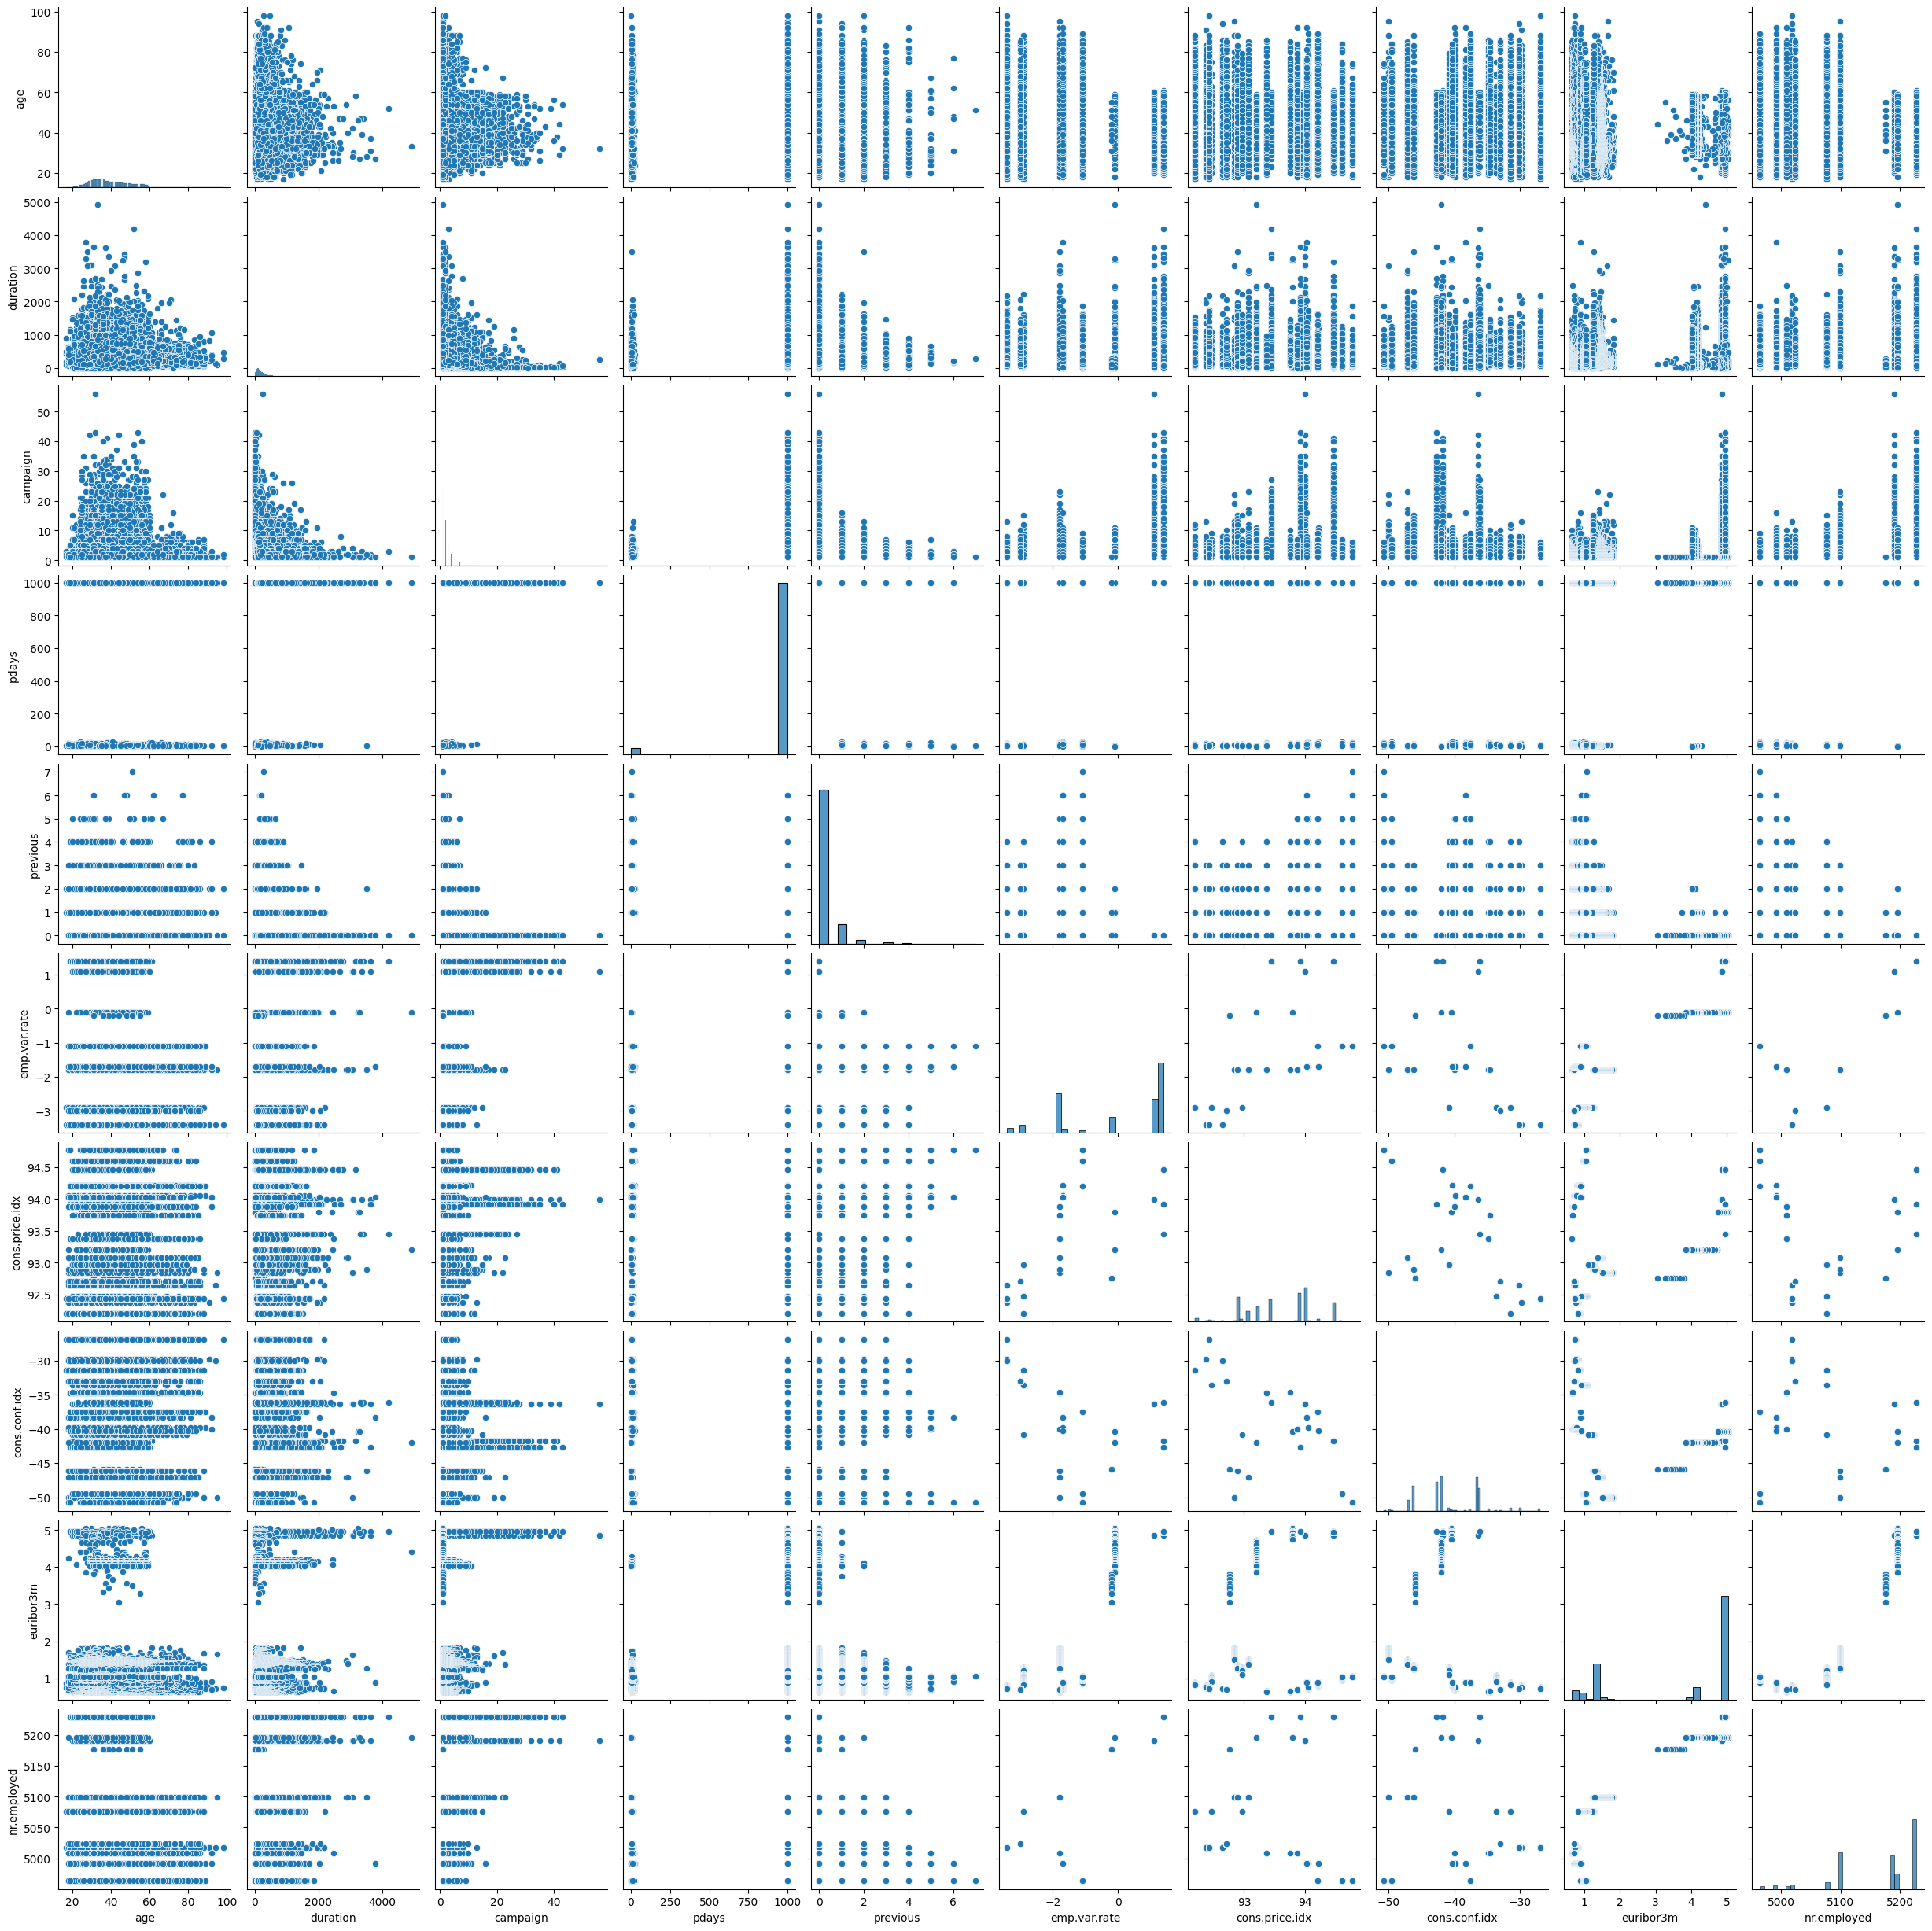

In [17]:
sns.pairplot(df)

In [18]:
df.rename(columns={'y': 'Response'}, inplace=True)

In [19]:
fig = make_subplots(
    rows=7, cols=2, subplot_titles=('job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'Response'),
       specs=[[{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}]],
)

colours = []

fig.add_trace(go.Pie(labels=np.array(df['job'].value_counts().index),
                     values=[x for x in df['job'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=1, col=1)

fig.add_trace(go.Pie(labels=np.array(df['marital'].value_counts().index),
                     values=[x for x in df['marital'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=1, col=2)

fig.add_trace(go.Pie(labels=np.array(df['education'].value_counts().index),
                     values=[x for x in df['education'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=2, col=1)

fig.add_trace(go.Pie(labels=np.array(df['default'].value_counts().index),
                     values=[x for x in df['default'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=2, col=2)

fig.add_trace(go.Pie(labels=np.array(df['housing'].value_counts().index),
                     values=[x for x in df['housing'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=3, col=1)

fig.add_trace(go.Pie(labels=np.array(df['loan'].value_counts().index),
                     values=[x for x in df['loan'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=3, col=2)

fig.add_trace(go.Pie(labels=np.array(df['contact'].value_counts().index),
                     values=[x for x in df['contact'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=4, col=1)

fig.add_trace(go.Pie(labels=np.array(df['month'].value_counts().index),
                     values=[x for x in df['month'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=4, col=2)

fig.add_trace(go.Pie(labels=np.array(df['day_of_week'].value_counts().index),
                     values=[x for x in df['day_of_week'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=5, col=1)

fig.add_trace(go.Pie(labels=np.array(df['poutcome'].value_counts().index),
                     values=[x for x in df['poutcome'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=5, col=2)

fig.add_trace(go.Pie(labels=np.array(df['Response'].value_counts().index),
                     values=[x for x in df['Response'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=6, col=1)




fig.update_layout(height=3200, font=dict(size=14), showlegend=False)

fig.show()


<ipython-input-20-f71a88f17f17>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



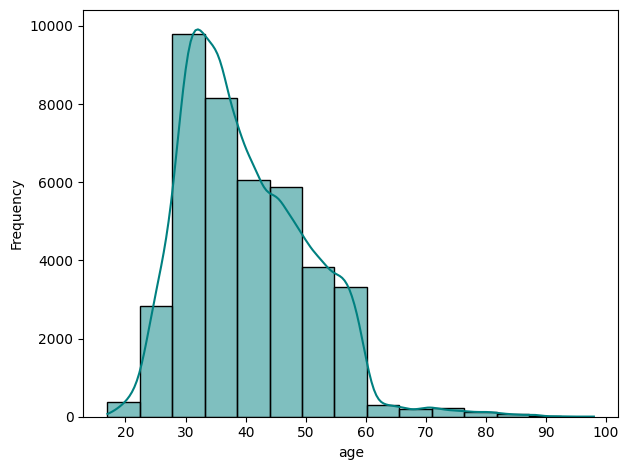

<ipython-input-20-f71a88f17f17>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



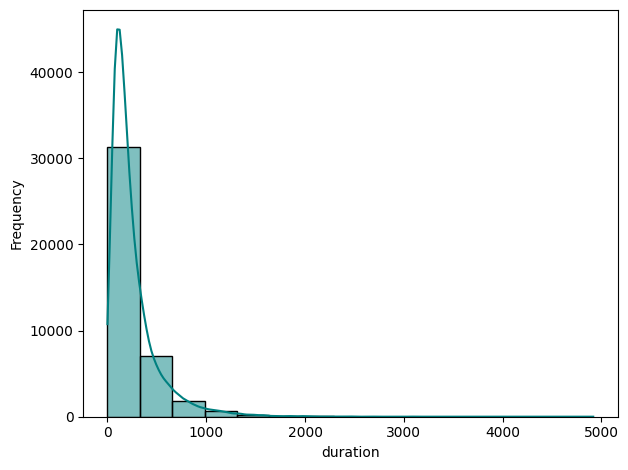

<ipython-input-20-f71a88f17f17>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



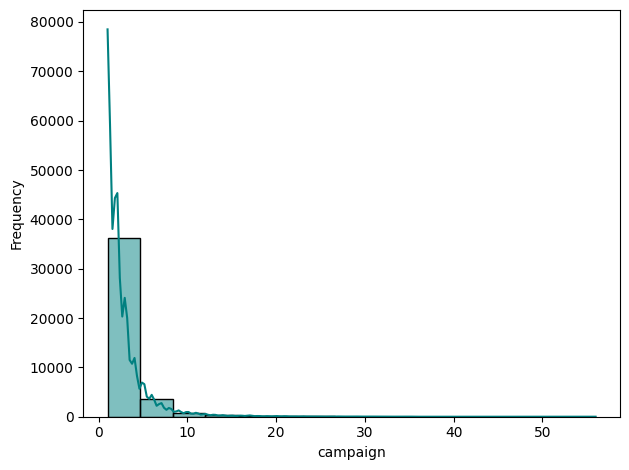

<ipython-input-20-f71a88f17f17>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



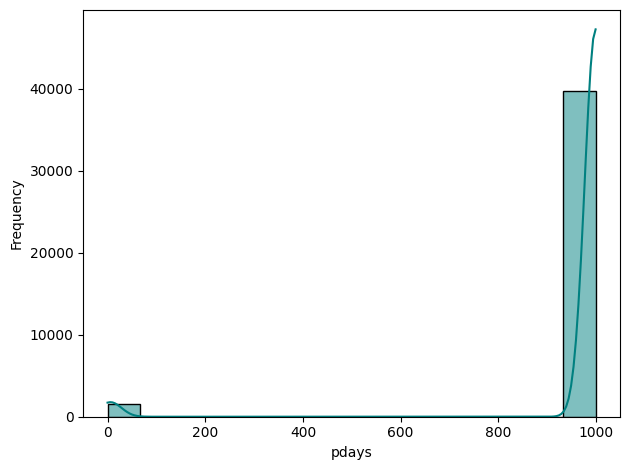

<ipython-input-20-f71a88f17f17>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



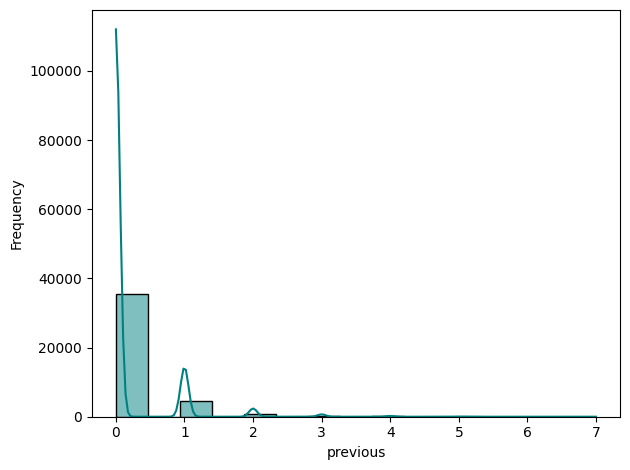

<ipython-input-20-f71a88f17f17>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



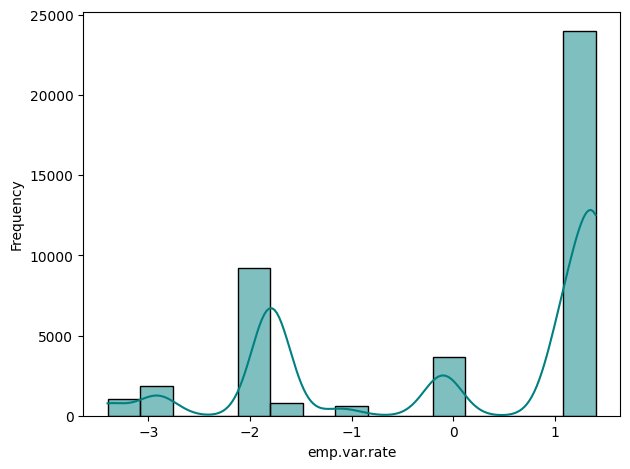

<ipython-input-20-f71a88f17f17>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



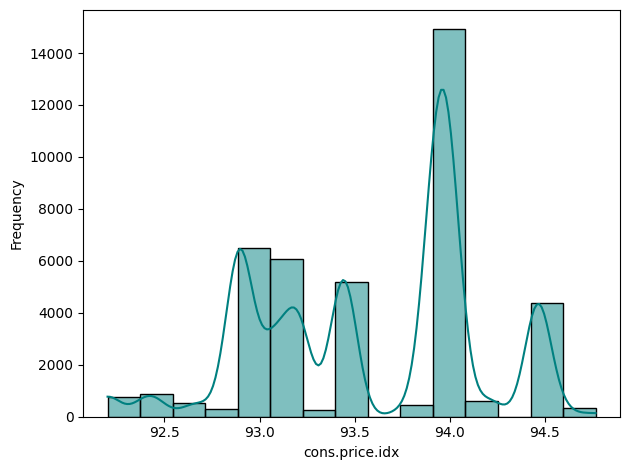

<ipython-input-20-f71a88f17f17>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



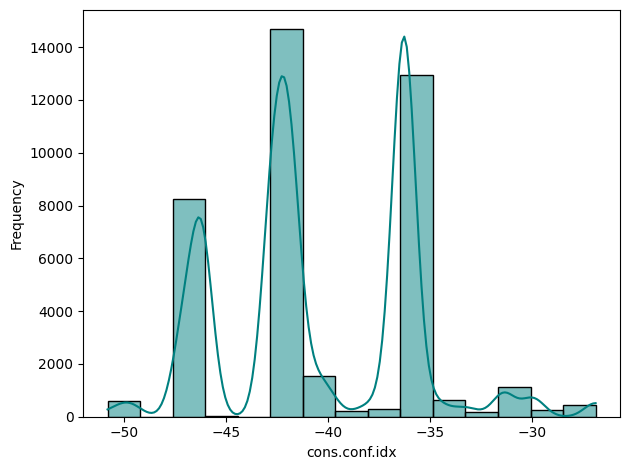

<ipython-input-20-f71a88f17f17>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



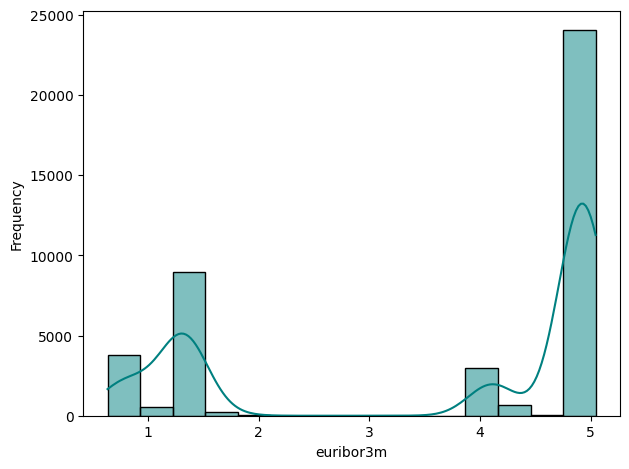

<ipython-input-20-f71a88f17f17>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



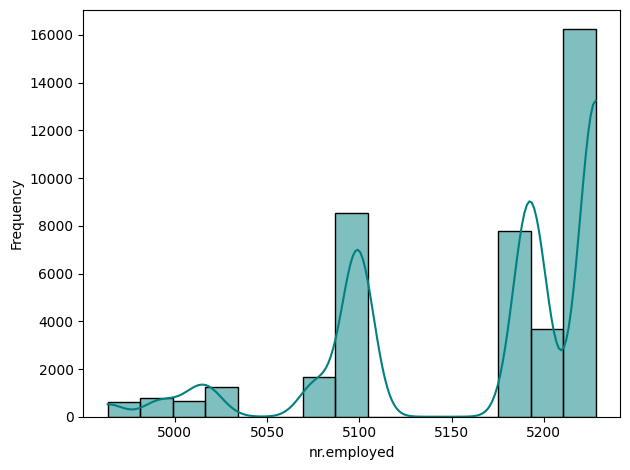

In [20]:
for i in Numerical:
    ax=sns.histplot(x= df[i], color='teal', bins= 15, kde= True, palette= 'twilight')
    ax.set(xlabel= i , ylabel= 'Frequency')

    plt.tight_layout()
    plt.show()

In [21]:
data=df.copy()


In [22]:
# correlation matrix
#plt.figure(figsize=(15,8))
#sns.heatmap(data.corr(),annot=True)

In [23]:
summary_stats = data.describe()
print(summary_stats)

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

In [24]:
# Job Distribution (Bar plot)
job_counts = data['job'].value_counts()
fig = px.bar(job_counts, x=job_counts.index, y=job_counts.values, labels={'x': 'Job', 'y': 'Count'})
fig.update_layout(title='Job Distribution')
fig.show()

In [25]:
# Marital Status Distribution (Pie chart)
marital_counts = data['marital'].value_counts()
fig = px.pie(marital_counts, values=marital_counts.values, names=marital_counts.index, title='Marital Status Distribution')
fig.show()

In [26]:
# Education Distribution (Donut chart)
education_counts = data['education'].value_counts()
fig = px.pie(education_counts, values=education_counts.values, names=education_counts.index, hole=0.4, title='Education Distribution')
fig.show()

In [27]:
# Age Distribution (Histogram)
fig = px.histogram(data, x='age', nbins=20, title='Age Distribution')
fig.show()

In [28]:
# Loan Distribution (Bar plot)
loan_counts = data['loan'].value_counts()
fig = px.bar(loan_counts, x=loan_counts.index, y=loan_counts.values, labels={'x': 'Loan', 'y': 'Count'})
fig.update_layout(title='Loan Distribution')
fig.show()

**encoding**

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
data=df.copy()

In [31]:
cols = ['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'Response']

#  Encode labels of multiple columns at once
#
data[cols] = data[cols].apply(LabelEncoder().fit_transform)

<ipython-input-32-5afc2bef99ef>:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



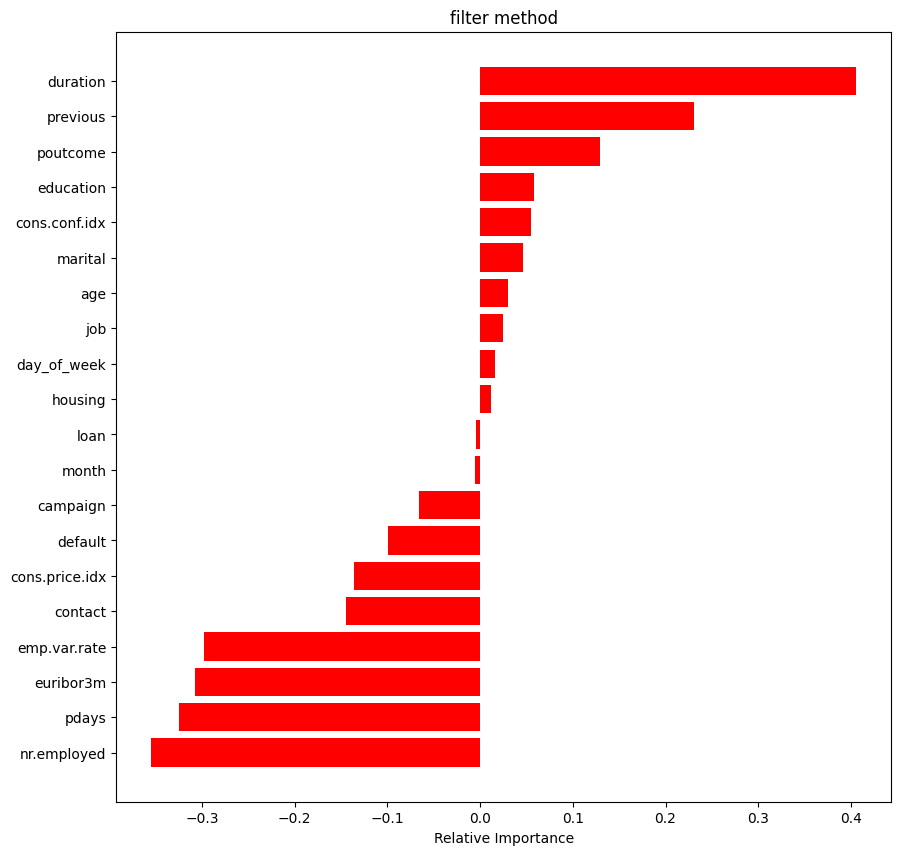

In [32]:
# correlation between each feature and the target column (Status)
importances = data.drop('Response', axis=1).apply(lambda x: x.corr(data.Response))
indices = np.argsort(importances)
names=list(data.drop('Response', axis=1).columns)
plt.figure(figsize=(10,10))
plt.title('filter method')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [33]:
import plotly.express as px
for i in Numerical:
    plt.figure()
    plt.tight_layout()

    plt.figure(figsize=(8,6))
    fig = px.box(df, y=df[i])
    fig.show()

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

**outliers**

In [34]:
number_of_outliers = [None] * len(data)
q75 = [None] * len(data)
q25 = [None] * len(data)
IQR = [None] * len(data)

for i, p in enumerate(data.columns):
    q75[i], q25[i] = np.percentile(data[p], [95, 5])
    IQR[i] = q75[i] - q25[i]
    number_of_outliers[i] = len(np.where((data[p] > (q75[i] + 1.5 * IQR[i])) | (data[p] < (q25[i] - 1.5 * IQR[i])))[0])

    print('Outliers of', p, ' =', number_of_outliers[i])
    print("*" * 40)

Outliers of age  = 0
****************************************
Outliers of job  = 0
****************************************
Outliers of marital  = 0
****************************************
Outliers of education  = 0
****************************************
Outliers of default  = 0
****************************************
Outliers of housing  = 0
****************************************
Outliers of loan  = 0
****************************************
Outliers of contact  = 0
****************************************
Outliers of month  = 0
****************************************
Outliers of day_of_week  = 0
****************************************
Outliers of duration  = 93
****************************************
Outliers of campaign  = 304
****************************************
Outliers of pdays  = 1515
****************************************
Outliers of previous  = 310
****************************************
Outliers of poutcome  = 0
****************************************
Outlier

In [35]:
Q1 = data.quantile(0.05)
Q3 = data.quantile(0.95)
IQR = Q3 - Q1

print("Number of outliers for entire dataset = ", len(data[((data< (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]))

Number of outliers for entire dataset =  1974


In [36]:
Q1 = data.quantile(0.05)
Q3 = data.quantile(0.95)
IQR = Q3 - Q1

outlier_mask = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
data = data[~outlier_mask]

In [37]:
Q1 = data.quantile(0.05)
Q3 = data.quantile(0.95)
IQR = Q3 - Q1

print("Number of outliers for entire dataset = ", len(data[((data< (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]))

Number of outliers for entire dataset =  8


In [38]:
number_of_outliers = [None] * len(data)
q75 = [None] * len(data)
q25 = [None] * len(data)
IQR = [None] * len(data)

for i, p in enumerate(data.columns):
    q75[i], q25[i] = np.percentile(data[p], [95, 5])
    IQR[i] = q75[i] - q25[i]
    number_of_outliers[i] = len(np.where((data[p] > (q75[i] + 1.5 * IQR[i])) | (data[p] < (q25[i] - 1.5 * IQR[i])))[0])

    print('Outliers of', p, ' =', number_of_outliers[i])
    print("*" * 40)

Outliers of age  = 0
****************************************
Outliers of job  = 0
****************************************
Outliers of marital  = 0
****************************************
Outliers of education  = 0
****************************************
Outliers of default  = 0
****************************************
Outliers of housing  = 0
****************************************
Outliers of loan  = 0
****************************************
Outliers of contact  = 0
****************************************
Outliers of month  = 0
****************************************
Outliers of day_of_week  = 0
****************************************
Outliers of duration  = 8
****************************************
Outliers of campaign  = 0
****************************************
Outliers of pdays  = 0
****************************************
Outliers of previous  = 0
****************************************
Outliers of poutcome  = 0
****************************************
Outliers of emp



---



---



---



---



---



# ⭕ Business Questions


---



Imagine you are a marketing analyst working for a Portuguese bank that offers term deposits to its clients. You want to understand what factors influence the clients’ decision to subscribe to the term deposit or not. You have access to a dataset that contains information about the clients, the marketing campaigns, and the economic indicators. You decide to use this data to answer some questions that will help you gain insights into the clients’ behavior and preferences.

You start by exploring the demographic characteristics of the clients, such as their age, job type, marital status, and education level. You wonder how these variables affect their likelihood of subscribing to the term deposit. You ask yourself:



---



---



In [39]:
import pandas as pd
import plotly.express as px

In [40]:
df = pd.read_csv('/content/bank-additional-full.csv', delimiter=';')

**How does the age of clients affect their likelihood of subscribing to the term deposit? (Q1)**

In [41]:
# Create a histogram to compare the age distribution of subscribers and non-subscribers
fig = px.histogram(df, x='age', color='y', barmode='overlay',
                   title='Age Distribution of Subscribers vs. Non-Subscribers')
fig.update_layout(xaxis_title='Age', yaxis_title='Count')
fig.show()



---



**What is the distribution of job types among clients who subscribed versus those who did not? (Q2)**

In [42]:
# Count the number of subscribers and non-subscribers for each job type
job_counts = df.groupby(['job', 'y']).size().reset_index(name='count')

# Create a stacked bar chart to compare job types among subscribers and non-subscribers
fig = px.bar(job_counts, x='job', y='count', color='y', barmode='stack',
             title='Job Types - Subscribers vs. Non-Subscribers')
fig.update_layout(xaxis_title='Job Type', yaxis_title='Count')
fig.show()



---



**Does marital status have an impact on the subscription rate? (Q3)**

In [43]:
# Calculate the subscription rate for each marital status
marital_rates = df.groupby(['marital', 'y']).size().unstack().reset_index()
marital_rates['subscription_rate'] = marital_rates['yes'] / (marital_rates['yes'] + marital_rates['no'])

# Create a bar chart to compare subscription rates among different marital statuses
fig = px.bar(marital_rates, x='marital', y='subscription_rate',
             title='Subscription Rate by Marital Status')
fig.update_layout(xaxis_title='Marital Status', yaxis_title='Subscription Rate')
fig.show()



---



**Are there any differences in education levels between subscribers and non-subscribers? (Q4)**

In [44]:
# Count the number of subscribers and non-subscribers for each education level
education_counts = df.groupby(['education', 'y']).size().reset_index(name='count')

# Create a stacked bar chart to compare education levels among subscribers and non-subscribers
fig = px.bar(education_counts, x='education', y='count', color='y', barmode='stack',
             title='Education Levels - Subscribers vs. Non-Subscribers')
fig.update_layout(xaxis_title='Education Level', yaxis_title='Count')
fig.show()



---





---



**You then move on to examine the economic indicators, such as the employment variation rate and consumer price index. You want to know how these variables correlate with the subscription rate. You ask yourself:**

**How do economic indicators, such as the employment variation rate and consumer price index, correlate with the subscription rate? (Q5)**

In [45]:
# Load the cleaned dataset
df = pd.read_csv('/content/bank-additional-full.csv', delimiter=';')

# Check the data types and clean data if necessary
# Convert 'y' column to binary values if it's not already
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Calculate the average subscription rate for each level of the employment variation rate
emp_var_rate_avg = df.groupby('emp.var.rate')['y'].mean().reset_index()

# Calculate the average subscription rate for each level of the consumer price index
cons_price_idx_avg = df.groupby('cons.price.idx')['y'].mean().reset_index()

# Create line plots to visualize the correlation between economic indicators and subscription rate
fig = go.Figure()
fig.add_trace(go.Scatter(x=emp_var_rate_avg['emp.var.rate'], y=emp_var_rate_avg['y'],
                         mode='lines', name='Employment Variation Rate'))
fig.add_trace(go.Scatter(x=cons_price_idx_avg['cons.price.idx'], y=cons_price_idx_avg['y'],
                         mode='lines', name='Consumer Price Index'))
fig.update_layout(title='Correlation between Economic Indicators and Subscription Rate',
                   xaxis_title='Economic Indicator', yaxis_title='Subscription Rate')
fig.show()




---



**Is there a particular month or day of the week that yields a higher subscription rate? (Q7)**

In [46]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('/content/bank-additional-full.csv', delimiter=';')

# Calculate the subscription rate for each month
month_rates = df.groupby(['month', 'y']).size().unstack().reset_index()
month_rates['subscription_rate'] = month_rates['yes'] / (month_rates['yes'] + month_rates['no'])

# Create a bar chart with a custom purple color
custom_color = 'purple'

fig = px.bar(month_rates, x='month', y='subscription_rate',
             title='Subscription Rate by Month', color_discrete_sequence=[custom_color])
fig.update_layout(xaxis_title='Month', yaxis_title='Subscription Rate')
fig.show()



---



**How does the duration of the call influence the likelihood of subscription? (Q8)**

In [47]:
# Create a histogram with pink shades
fig = px.histogram(df, x='duration', color='y', barmode='overlay',
                   title='Call Duration Distribution of Subscribers vs. Non-Subscribers',
                   color_discrete_sequence=['lightpink', 'deeppink'])
fig.update_layout(xaxis_title='Call Duration', yaxis_title='Count')
fig.show()



---



**You also want to explore how the number of contacts made during the campaign affects the outcome. You wonder if there are any patterns in the number of contacts for subscribers and non-subscribers. You ask yourself:**

**Are there any patterns in the number of contacts made during the campaign for subscribers and non-subscribers? (Q9)**

In [48]:
# Create a box plot to compare the number of contacts distribution of subscribers and non-subscribers
fig = px.box(df, x='y', y='campaign', points='all',
             title='Number of Contacts Distribution of Subscribers vs. Non-Subscribers')
fig.update_layout(xaxis_title='Term Deposit Subscription', yaxis_title='Number of Contacts')
fig.show()



---



**Additionally, you want to investigate how the outcome of the previous campaign impacts the current subscription rate. You want to know if there is any effect of the previous campaign on the current one. You ask yourself:**

**Does the outcome of the previous campaign have any effect on the current subscription rate? (Q10)**

In [49]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('/content/bank-additional-full.csv', delimiter=';')

# Calculate the subscription rate based on the outcome of the previous campaign
poutcome_rates = df.groupby(['poutcome', 'y']).size().unstack().reset_index()
poutcome_rates['subscription_rate'] = poutcome_rates['yes'] / (poutcome_rates['yes'] + poutcome_rates['no'])

# Define a custom color palette
custom_colors = ['purple', 'darkred', 'pink']

# Create a donut chart with custom colors
fig = px.pie(poutcome_rates, names='poutcome', values='subscription_rate',
             title='Subscription Rate by Previous Campaign Outcome',
             hole=0.5, color_discrete_sequence=custom_colors)
fig.show()


**After answering these questions, you decide to dig deeper into some of the variables that you found interesting or surprising. You want to explore how they interact with each other and how they affect the subscription rate in more detail. You ask yourself:**

**What is the distribution of age among subscribers based on their education level? (Q11)**

In [50]:
# Create a box plot to compare the age distribution of subscribers based on education level
fig = px.box(df[df['y'] == 'yes'], x='education', y='age',
             title='Age Distribution of Subscribers by Education Level')
fig.update_layout(xaxis_title='Education Level', yaxis_title='Age')
fig.show()



---



**How does the number of employees in a client’s company relate to their likelihood of subscribing to a term deposit? (Q12)**

In [51]:
# Calculate the subscription rate for each number of employees category
emp_counts = df.groupby(['nr.employed', 'y']).size().unstack().reset_index()
emp_counts['subscription_rate'] = emp_counts['yes'] / (emp_counts['yes'] + emp_counts['no'])

# Create a scatter plot to visualize the relationship between number of employees and subscription rate
fig = go.Figure()
fig.add_trace(go.Scatter(x=emp_counts['nr.employed'], y=emp_counts['subscription_rate'],
                         mode='markers', name='Subscription Rate'))
fig.update_layout(title='Number of Employees vs. Subscription Rate',
                  xaxis_title='Number of Employees', yaxis_title='Subscription Rate')
fig.show()



---



**What is the distribution of campaign outcomes based on the contact method used? (Q13)**

In [52]:
# Count the number of campaign outcomes for each contact method
outcome_counts = df.groupby(['contact', 'poutcome']).size().unstack().reset_index()

# Create stacked bar charts to compare campaign outcomes based on contact methods
fig = px.bar(outcome_counts, x='contact', y=['failure', 'nonexistent', 'success'],
             barmode='stack', title='Campaign Outcomes by Contact Method')
fig.update_layout(xaxis_title='Contact Method', yaxis_title='Count')
fig.show()



---



**Is there a correlation between the number of previous contacts and the success of the current campaign? (Q14)**

In [53]:
import pandas as pd
import plotly.graph_objects as go

# Load the dataset
df = pd.read_csv('/content/bank-additional-full.csv', delimiter=';')
df['y'] = df['y'].map({'yes': 1, 'no': 0})
# Calculate the success rate of the current campaign based on the number of previous contacts
prev_contacts_success = df.groupby('previous')['y'].mean().reset_index()

# Create a line plot to visualize the correlation between previous contacts and campaign success
fig = go.Figure()
fig.add_trace(go.Scatter(x=prev_contacts_success['previous'], y=prev_contacts_success['y'],
                         mode='lines', name='Campaign Success Rate'))
fig.update_layout(title='Correlation between Previous Contacts and Campaign Success',
                  xaxis_title='Previous Contacts', yaxis_title='Campaign Success Rate')
fig.show()



---



**Does the housing loan status have any impact on the subscription rate? (Q15)**

In [54]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('/content/bank-additional-full.csv', delimiter=';')

# Calculate the subscription rate for each housing loan status
housing_rates = df.groupby(['housing', 'y']).size().unstack().reset_index()

# Check for missing values in the 'yes' and 'no' columns
if 'yes' not in housing_rates.columns or 'no' not in housing_rates.columns:
    print("The 'yes' or 'no' column is missing in the 'housing_rates' DataFrame.")
else:
    housing_rates['subscription_rate'] = housing_rates['yes'] / (housing_rates['yes'] + housing_rates['no'])

    # Define a list of three different shades of green
    custom_colors = ['green', 'royalblue', 'red']

    # Create a bar chart with custom colors
    fig = px.bar(housing_rates, x='housing', y='subscription_rate',
                 title='Subscription Rate by Housing Loan Status',
                 color='housing', color_discrete_sequence=custom_colors)
    fig.update_layout(xaxis_title='Housing Loan Status', yaxis_title='Subscription Rate')
    fig.show()




---



**How does the duration of the last contact influence the success rate? (Q16)**

In [55]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})
# Calculate the success rate based on the duration of the last contact
duration_success = df.groupby('duration')['y'].mean().reset_index()

# Create a line plot to visualize the relationship between duration and success rate
fig = go.Figure()
fig.add_trace(go.Scatter(x=duration_success['duration'], y=duration_success['y'],
                         mode='lines', name='Success Rate'))
fig.update_layout(title='Duration of Last Contact vs. Success Rate',
                  xaxis_title='Duration (seconds)', yaxis_title='Success Rate')
fig.show()

In [56]:
import pandas as pd
import plotly.graph_objs as go

# Load the dataset
df = pd.read_csv('/content/bank-additional-full.csv', delimiter=';')

df['y'] = df['y'].map({'yes': 1, 'no': 0})
# Calculate the success rate based on the duration of the last contact
duration_success = df.groupby('duration')['y'].mean().reset_index()

# Create a scatter plot to visualize the relationship between duration and success rate
fig = go.Figure()
fig.add_trace(go.Scatter(x=duration_success['duration'], y=duration_success['y'],
                         mode='markers', name='Success Rate', marker=dict(size=6)))
fig.update_layout(title='Duration of Last Contact vs. Success Rate',
                  xaxis_title='Duration (seconds)', yaxis_title='Success Rate')
fig.show()




---





---



**How does the month of contact relate to the success of the campaign? (Q18)**

In [57]:
import pandas as pd
import plotly.graph_objects as go

# Load the dataset
df = pd.read_csv('/content/bank-additional-full.csv', delimiter=';')

# Convert 'yes' and 'no' in 'y' column to 1 and 0
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Calculate the success rate for each month
month_success = df.groupby('month')['y'].mean().reset_index()

# Define a color sequence with a different color for each bar
custom_colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown',
                 'grey', 'cyan', 'magenta']

# Create a bar chart with a different color for each bar
fig = go.Figure()
fig.add_trace(go.Bar(x=month_success['month'], y=month_success['y'],
                     name='Success Rate', marker_color=custom_colors))
fig.update_layout(title='Success Rate by Month', xaxis_title='Month', yaxis_title='Success Rate')
fig.show()




---



**Is there a relationship between the number of days since the client was last contacted and their likelihood of subscribing? (Q19)**

In [58]:
import pandas as pd
import plotly.graph_objects as go

# Load the dataset
df = pd.read_csv('/content/bank-additional-full.csv', delimiter=';')
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Calculate the subscription rate based on the number of days since last contact
duration_success = df.groupby('duration')['y'].mean().reset_index()

# Create a line plot to visualize the relationship between days since last contact and subscription rate
fig = go.Figure()
fig.add_trace(go.Scatter(x=duration_success['duration'], y=duration_success['y'],
                         mode='lines', name='Subscription Rate'))
fig.update_layout(title='Days Since Last Contact vs. Subscription Rate',
                  xaxis_title='Days', yaxis_title='Subscription Rate')
fig.show()

In [59]:
import pandas as pd
import plotly.graph_objects as go

# Load the dataset
df = pd.read_csv('/content/bank-additional-full.csv', delimiter=';')
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Calculate the subscription rate based on the number of days since last contact
duration_success = df.groupby('duration')['y'].mean().reset_index()

# Create a scatter plot to visualize the relationship between days since last contact and subscription rate
fig = go.Figure()
fig.add_trace(go.Scatter(x=duration_success['duration'], y=duration_success['y'],
                         mode='markers', name='Subscription Rate',
                         marker=dict(color='blue', size=6)))  # Change the marker color to blue
fig.update_layout(title='Days Since Last Contact vs. Subscription Rate',
                  xaxis_title='Days', yaxis_title='Subscription Rate')
fig.show()




---



**How does the outcome of the previous campaign impact the success of the current campaign? (Q20)**

In [60]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('/content/bank-additional-full.csv', delimiter=';')

# Count the number of current campaign outcomes based on the previous campaign outcome
outcome_counts = df.groupby(['poutcome', 'y']).size().unstack().reset_index()

# Create a stacked bar chart with a custom color (red)
fig = px.bar(outcome_counts, x='poutcome', y=['failure', 'nonexistent', 'success'],
             barmode='stack', title='Current Campaign Outcomes by Previous Campaign Outcomes',
             color_discrete_sequence=['red'])
fig.update_layout(xaxis_title='Previous Campaign Outcome', yaxis_title='Count')
fig.show()




---



In [61]:
df["default"]

0             no
1        unknown
2             no
3             no
4             no
          ...   
41183         no
41184         no
41185         no
41186         no
41187         no
Name: default, Length: 41188, dtype: object

<Axes: xlabel='default', ylabel='count'>

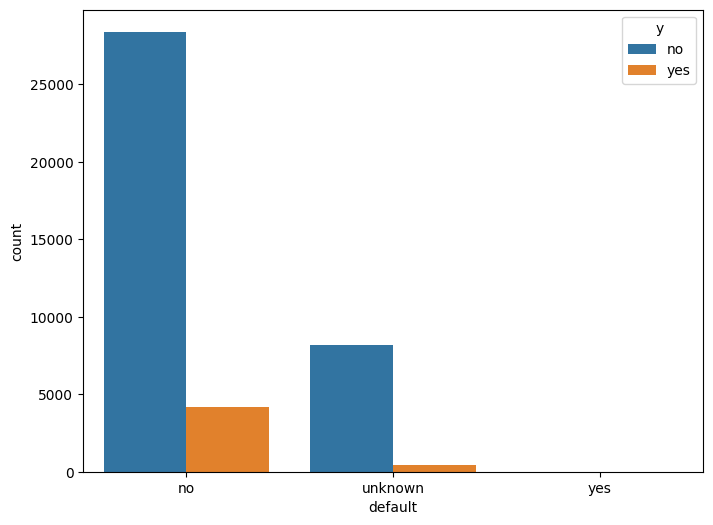

In [62]:
plt.figure(figsize=(8,6))
sns.countplot (x='default',hue='y',data=df)

# ⭕Business Conclusion




---



Q1: Age Distribution: The age of clients seems to have an impact on their likelihood of subscribing to the term deposit. By comparing the age distribution of subscribers and non-subscribers, we can observe any significant differences. It is recommended to analyze the histogram visualization to better understand the age patterns and identify any age groups that show a higher subscription rate.

**- Tips for the Bank:**

* Targeted Marketing: Use the insights gained from the analysis to create targeted marketing campaigns. Focus on age groups, job types, marital statuses, and educational backgrounds that show a higher likelihood of subscribing to the term deposit. Tailor the messaging and channels to effectively reach these target segments.
_______________________________________________________________________________
Q2: Job Types: The distribution of job types among clients who subscribed and those who did not provides valuable information. By examining the stacked bar chart, we can identify which job types have a higher subscription rate. This insight can be used to target specific occupations or industries in future marketing campaigns.

**- Tips for the Bank:**

* Personalization: Leverage the demographic information to personalize the communication and offers for different client segments. Craft messages that resonate with their specific characteristics and preferences. Personalization can enhance engagement and increase the chances of conversion.
________________________________________________________________________________
Q3: Marital Status: Marital status appears to have an influence on the subscription rate. Analyzing the bar chart displaying subscription rates for different marital statuses helps us understand the preferences of married, single, divorced, or widowed clients. This information can be used to tailor marketing strategies and messaging accordingly.

**- Tips for the Bank:**

* Economic Context: Stay informed about the prevailing economic conditions and adapt marketing strategies accordingly. Monitor the employment variation rate, consumer price index, and other relevant economic indicators to identify trends and adjust campaign messaging and offers accordingly.
________________________________________________________________________________
Q4: Education Levels: There might be differences in the education levels between subscribers and non-subscribers. By examining the stacked bar chart, we can identify which education levels have a higher subscription rate. This knowledge can help in targeting specific educational backgrounds during marketing campaigns.

**- Tips for the Bank:**

* Customer Retention: Analyze the data further to understand the factors contributing to customer retention. Identify patterns among existing clients who have subscribed to term deposits in the past and develop strategies to enhance customer loyalty and encourage repeat subscriptions.

________________________________________________________________________________
Q5: Economic Indicators: The correlation between economic indicators, such as the employment variation rate and consumer price index, with the subscription rate provides insights into how the overall economic conditions impact clients' decisions. Analyzing the line plots for these indicators allows us to understand the relationship between economic factors and the subscription rate. This information can be used to adjust marketing strategies based on the prevailing economic conditions.

**- Tips for the Bank:**

* Continuous Analysis: Regularly analyze customer data, campaign outcomes, and economic indicators to identify changing trends and patterns. Implement a feedback loop to continuously improve marketing strategies and optimize the subscription rate.
________________________________________________________________________________
Q6: Contact Methods: The distribution of contact methods used in the campaigns provides valuable information. By understanding the preferred contact methods of clients, the bank can tailor its communication channels accordingly. It is recommended to focus on the most effective contact methods and optimize their usage in future campaigns.

**- Tips for the Bank:**

* Channel Optimization: Focus on the contact methods that have shown higher effectiveness in terms of subscription rate. Allocate resources and efforts towards optimizing these channels, such as phone calls or personalized emails, to enhance conversion rates.
________________________________________________________________________________
Q7: Timing: There is a variation in the subscription rate across different months. It is important to identify the months that yield a higher subscription rate and leverage this knowledge in campaign planning. By aligning marketing efforts with favorable months, the bank can increase the chances of success.

**- Tips for the Bank:**

* Seasonal Campaign Planning: Consider the monthly variations in subscription rates when planning marketing campaigns. Allocate higher resources and intensify efforts during months that historically yield a higher subscription rate. This approach can maximize campaign effectiveness.
________________________________________________________________________________
Q8: Call Duration: The duration of the call appears to have an impact on the likelihood of subscription. Analyzing the call duration distribution of subscribers and non-subscribers can help identify optimal call durations. It is recommended to train call center agents on effective communication techniques and provide guidelines on call duration to maximize the conversion rate.

**- Tips for the Bank:**

* Call Center Training: Provide training to call center agents on effective communication techniques and call duration optimization. Equip them with the necessary skills to engage clients, address concerns, and deliver persuasive messages within an optimal call duration.
________________________________________________________________________________
Q9: Number of Contacts: There is a difference in the number of contacts made during the campaign for subscribers and non-subscribers. Analyzing the distribution of contacts can help identify the optimal number of contacts to maximize the subscription rate. It is important to strike a balance between persistence and avoiding excessive contacts that may lead to customer dissatisfaction.

**- Tips for the Bank:**

* Targeted Contact Strategies: Analyze the number of contacts made during the campaign for subscribers and non-subscribers. Use this information to develop targeted contact strategies that strike the right balance between persistence and avoiding excessive contacts. Tailor the frequency and timing of contacts to improve the subscription rate.
________________________________________________________________________________
Q10: Previous Campaign Outcome: The outcome of the previous campaign has an impact on the current subscription rate. Analyzing the subscription rate based on the previous campaign outcome can help in campaign targeting and messaging. It is recommended to personalize marketing efforts based on the previous interaction with clients to improve engagement and conversion.

**- Tips for the Bank:**

* Personalized Campaigns: Leverage insights from the previous campaign outcome to personalize marketing efforts. Craft messages and offers that align with the client's previous interaction and address their specific needs. Personalization can significantly improve the subscription rate.

* Continuous Monitoring: Continuously monitor campaign outcomes, contact methods, timing, and other relevant metrics. Implement a feedback loop to measure and analyze the impact of changes made based on the insights gained. This iterative approach can lead to continuous improvement in marketing campaigns and subscription rates.
________________________________________________________________________________
Q11: Distribution of Age by Education Level:
The box plot illustrates the distribution of age among subscribers based on their education level. This visualization allows us to understand how age varies within different education categories. It can help in identifying any age-related patterns or preferences among subscribers.

**- Tips for the Bank:**

* Age-Based Targeting: Consider the age distribution among subscribers based on their education level. Tailor marketing messages and offers to resonate with specific age groups within each education category.
________________________________________________________________________________
Q12: Number of Employees and Subscription Rate:
The scatter plot shows the relationship between the number of employees in a client's company and their likelihood of subscribing to a term deposit. By analyzing this plot, we can determine if there is any correlation between the number of employees and the subscription rate. This insight can help in targeting specific company sizes that are more likely to subscribe.

**- Tips for the Bank:**

* Company Size Targeting: Analyze the relationship between the number of employees in a client's company and their likelihood of subscribing. Develop targeted campaigns for companies of different sizes to maximize the subscription rate.

________________________________________________________________________________
Q13: Campaign Outcomes by Contact Method:
The stacked bar charts compare the distribution of campaign outcomes based on the contact method used. This visualization provides a clear understanding of which contact methods have yielded successful outcomes and which ones have resulted in failures or non-existent outcomes. It can help in optimizing future campaign strategies by focusing on the most effective contact methods.

**- Tips for the Bank:**

* Contact Method Optimization: Review the campaign outcomes based on the contact method used. Focus resources and efforts on the most effective contact methods to improve campaign success.
________________________________________________________________________________
Q14: Correlation between Previous Contacts and Campaign Success:
The line plot showcases the correlation between the number of previous contacts made and the success rate of the current campaign. By analyzing this plot, we can determine if there is a relationship between the two variables. This information can guide the bank in determining the optimal number of contacts to maximize campaign success.

**- Tips for the Bank:**

* Optimal Contact Frequency: Analyze the correlation between previous contacts and campaign success. Determine the optimal number of contacts to maximize the chances of a successful campaign without overwhelming clients.

________________________________________________________________________________
Q15: Impact of Housing Loan Status on Subscription Rate:
The bar chart displays the subscription rate based on the housing loan status of clients. It allows us to compare the subscription rates for clients with and without housing loans. This visualization helps identify if housing loan status has any impact on the likelihood of subscribing to a term deposit. It can guide the bank in tailoring marketing strategies specifically for clients with different housing loan statuses.

**- Tips for the Bank:**

* Housing Loan Considerations: Evaluate the impact of housing loan status on the subscription rate. Develop personalized campaigns or offers that address the specific needs or concerns of clients with different housing loan statuses.
________________________________________________________________________________
Q16: Duration of Last Contact and Success Rate:
The line plot/ scatter plot showcases the relationship between the duration of the last contact and the success rate of the campaign. By analyzing this plot, we can determine whether there is a correlation between the duration and the success rate. This information can guide the bank in optimizing the duration of future contacts to maximize the success rate.

**- Tips for the Bank:**

* Optimize Contact Duration: Analyze the relationship between the duration of the last contact and the success rate. Determine the optimal duration that maximizes the success rate and adjust future contacts accordingly.

________________________________________________________________________________
Q17: Distribution of Subscribers by Job Types:
The pie chart visualizes the distribution of subscribers based on their job types. It provides a clear understanding of the percentage of subscribers in each job category. This insight can help the bank in tailoring marketing strategies and offers to specific job types that have a higher likelihood of subscribing.

**- Tips for the Bank:**

* Job-Specific Targeting: Utilize the distribution of subscribers by job types to tailor marketing messages and offers to specific job categories that have a higher likelihood of subscribing.

________________________________________________________________________________
Q18: Month of Contact and Campaign Success:
The bar chart displays the success rate of the campaign for each month. It allows us to compare the success rates across different months and identify any patterns or trends. This information can help the bank in determining the optimal timing for future campaigns and adjusting resources accordingly.

**- Tips for the Bank:**

* Timing of Campaigns: Evaluate the success rates by month and identify the months with higher success rates. Plan future campaigns to coincide with those months to increase the chances of success.
________________________________________________________________________________
Q19: Days Since Last Contact and Subscription Rate:
The line plot/ scatter plot illustrates the relationship between the number of days since the client was last contacted and their likelihood of subscribing. By analyzing this plot, we can determine if there is a correlation between the two variables. This information can guide the bank in determining the optimal frequency of contacts to maximize the subscription rate.

**- Tips for the Bank:**

* Contact Frequency: Analyze the relationship between the number of days since last contact and the subscription rate. Find the optimal frequency of contacts to maximize the subscription rate without overwhelming clients.

________________________________________________________________________________
Q20: Impact of Previous Campaign Outcome on Current Campaign Success:
The stacked bar chart compares the distribution of current campaign outcomes based on the previous campaign outcome. This visualization provides insights into how the outcome of the previous campaign influences the success of the current campaign. It can guide the bank in developing targeted strategies for clients based on their previous campaign outcomes.

**- Tips for the Bank:**

* Personalized Strategies: Consider the impact of previous campaign outcomes on the current campaign. Develop targeted strategies for clients based on their previous campaign outcomes to increase the chances of success.

________________________________________________________________________________
________________________________________________________________________________
________________________________________________________________________________


# ⭕ SWOT Analysis
Strengths:

* Data-Driven Decision Making: The bank has access to a rich dataset and has conducted thorough analyses to understand various factors affecting the success of their campaigns.
* Visualization Capabilities: The bank effectively utilizes visualizations such as line plots, scatter plots, bar charts, and pie charts to present data insights in a clear and understandable manner.
* Targeted Marketing: The bank has the ability to tailor marketing strategies and offers based on job types, contact duration, timing, and previous campaign outcomes, enabling personalized and effective approaches.
Weaknesses:

* Limited Dataset: The analysis is based on the available dataset up to a certain cutoff date. Newer data may provide additional insights and trends that are not captured in the current analysis.
* External Factors: The analysis primarily focuses on internal factors within the dataset, and external market dynamics, competition, and economic conditions may also impact campaign success.
Opportunities:

* Advanced Analytics: The bank can further enhance their analysis by employing advanced analytics techniques such as predictive modeling, segmentation, and clustering to identify patterns and target specific customer segments with higher precision.
* Real-Time Data Analysis: Implementing real-time data analysis and monitoring systems can provide up-to-date insights and enable the bank to make proactive adjustments to their campaigns based on emerging trends.
Threats:

* Privacy and Compliance: The bank needs to ensure compliance with data privacy regulations and maintain the security and confidentiality of customer information while conducting data analysis.
* Technological Advancements: Rapid advancements in technology and analytics require the bank to stay updated and invest in the necessary infrastructure and tools to effectively leverage data for marketing campaigns.
Conclusion:
* The bank has made significant progress in understanding the factors influencing the success of their marketing campaigns through the analysis of various questions. By optimizing contact duration, leveraging job-specific targeting, considering the timing of campaigns, managing contact frequency, and implementing personalized strategies based on previous campaign outcomes, the bank can improve their campaign success rate.


* By capitalizing on strengths, addressing weaknesses, pursuing opportunities, and mitigating threats, the bank can develop more effective marketing strategies, enhance campaign outcomes, and achieve sustainable business growth. Regular monitoring, adaptation, and continuous improvement based on new insights and market dynamics are essential for long-term success.

---

# THANK YOU 💗

** preprocessing for modeling**

# Solve imbalance Data

**We Will apply different Technique and we will
Choose the best Technique **

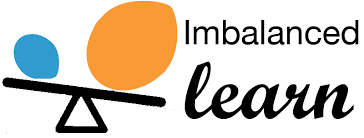

**first Apply under sampling**

InstanceHardnessThreshold InstanceHardnessThreshold:nstanceHardnessThreshold is an undersampling technique for handling imbalanced data. It works by removing majority class data points that are easy to classify.

 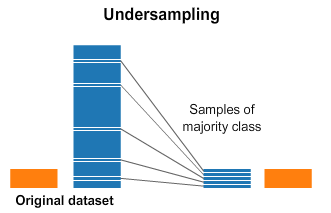



In [63]:
#lencode data
le = LabelEncoder()
categorical_columns = [column for column in data1.columns if data1[column].dtype.name == 'object']
for column in categorical_columns:
    data1[column] = le.fit_transform(data1[column])
dat_under=data1.copy()
Y=dat_under["y"]
X=dat_under.drop(columns="y",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
iht = InstanceHardnessThreshold(random_state=42)
X_iht, y_iht = iht.fit_resample(X_train,y_train)
model= DecisionTreeClassifier()
model.fit(X_iht, y_iht)
y_pred_train = model.predict(X_iht)
y_pred_test = model.predict(X_test)
accuracy_train = accuracy_score(y_iht, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("accuracy_train:", accuracy_train*100,"%")
print("accuracy_test:", accuracy_test*100,"%")

accuracy_train: 100.0 %
accuracy_test: 80.11071185782266 %


**Apply hybrid over with under**

SMOTEENN first oversamples the minority class using the SMOTE algorithm. Then, it undersamples the majority class by removing data points that are close to the minority class. This is done to prevent the model from being biased towards the majority class.

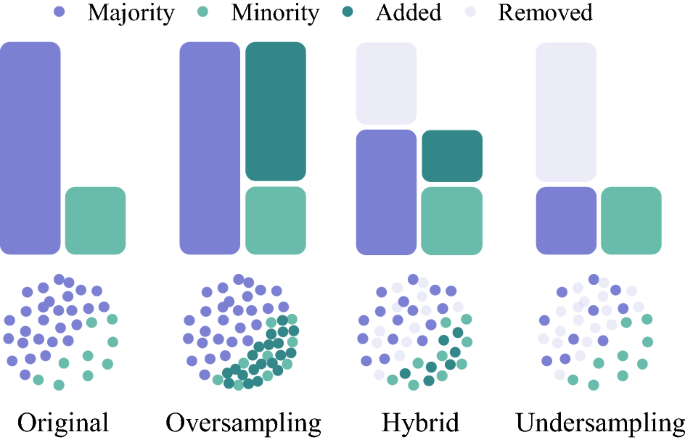

In [64]:
from imblearn.combine import SMOTEENN
dat_hybrid=data1.copy()
Y=dat_hybrid["y"]
X=dat_hybrid.drop(columns="y",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
sme = SMOTEENN(random_state=42)
X_sme, y_sme = sme.fit_resample(X_train,y_train)
dtc = DecisionTreeClassifier()
dtc.fit(X_sme, y_sme)
y_pred_train = model.predict(X_sme)
y_pred_test = model.predict(X_test)
accuracy_train = accuracy_score(y_sme, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("accuracy_train:", accuracy_train*100,"%")
print("accuracy_test:", accuracy_test*100,"%")

accuracy_train: 94.65698803803292 %
accuracy_test: 80.91677187530348 %


**Apply over Sampling**

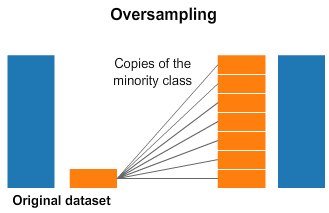


SMOTE:Synthetic Minority Over-sampling Technique, is an oversampling technique that artificially increases the number of data points in the minority class by creating new data points that are similar to the existing data points in the minority class. This is done to balance the dataset and improve the performance of machine learning models that are sensitive to imbalanced data.

In [65]:
from imblearn.over_sampling import SMOTE
dat_over=data1.copy()
Y=dat_over["y"]
X=dat_over.drop(columns="y",axis=1)
X_train,X_test,y_train,y_test= train_test_split(X, Y, test_size=0.25, random_state=42)
sm = SMOTE(random_state=42)
X_smo, y_smo = sm.fit_resample(X_train,y_train)
dtc= DecisionTreeClassifier()
dtc.fit(X_smo, y_smo)
y_pred_train = model.predict(X_smo)
y_pred_test = model.predict(X_test)
accuracy_train = accuracy_score(y_smo, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("accuracy_train:", accuracy_train*100,"%")
print("accuracy_test:", accuracy_test*100,"%")

accuracy_train: 88.02911983652022 %
accuracy_test: 80.91677187530348 %


**###### we will choose over sampling beacuase is more generalization than under and hybrid**


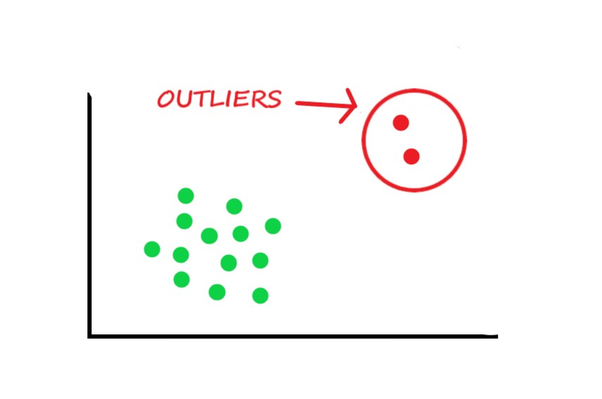

❌**when apply over sample after after handel outliers by norm.. ortandard.....**


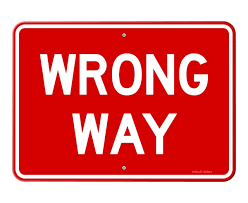

In [66]:
#when apply over sample after after handel outliers by norm.. ortandard.....
#the accuracy is low
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
#aplly stanadard scaler
numerical_columns = work_dat.select_dtypes(include=['int64', 'float64']).columns
scaler=StandardScaler()
work_dat[numerical_columns] = scaler.fit_transform(work_dat[numerical_columns])
#lencode data
le = LabelEncoder()
categorical_columns = [column for column in work_dat.columns if work_dat[column].dtype.name == 'object']
for column in categorical_columns:
   work_dat[column] = le.fit_transform(work_dat[column])
#assume Y1 AND X1  WE WILL work on it to the end.......
Y1=work_dat["y"]
X1=work_dat.drop(columns="y",axis=1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.25, random_state=42)

#over sample
sm=SMOTEENN(random_state=42)
X_smo1, y_smo1 = sm.fit_resample(X_train1,y_train1)

#Apply random forest
dtc1= RandomForestClassifier(n_estimators=100, random_state=42)
dtc1.fit(X_smo1, y_smo1)
y_pred_train1 = model.predict(X_smo1)
y_pred_test1 = model.predict(X_test1)
accuracy_train1 = accuracy_score(y_smo1, y_pred_train1)
accuracy_test1 = accuracy_score(y_test1, y_pred_test1)
print("accuracy_train:", accuracy_train1*100,"%")
print("accuracy_test:", accuracy_test1*100,"%")

accuracy_train: 46.0514622717725 %
accuracy_test: 88.80256385354957 %


**We Not The accuracy is very low beacuase we apply standard scaler then oversample  **  ❗



 *****************************************************************

**#when apply over sample before normalizarion.........** ✅:

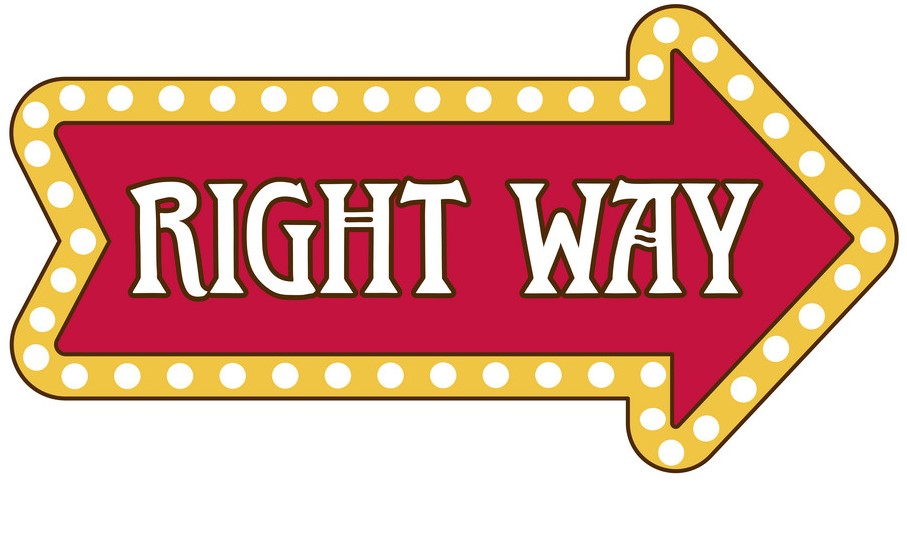

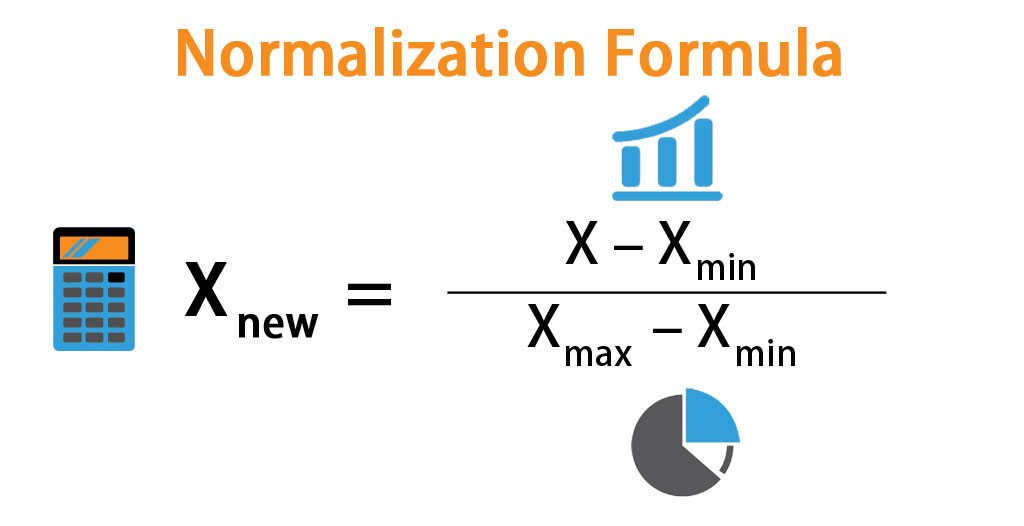

In [67]:
#when apply over sample before normalizarion.........
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
# Split the dataset into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.25, random_state=42)

# Apply SMOTE oversampling to the training data
sm = SMOTE(random_state=42)
X_smo1, y_smo1 = sm.fit_resample(X_train1, y_train1)

# Apply normalizarion to the numerical columns
numerical_columns = X_smo1.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
X_smo1[numerical_columns] = scaler.fit_transform(X_smo1[numerical_columns])
X_test1[numerical_columns] = scaler.transform(X_test1[numerical_columns])

# Create and train your RandomForestClassifier
rf_classifier1 =DecisionTreeClassifier(random_state=42)
rf_classifier1.fit(X_smo1, y_smo1)

# Make predictions on the standardized test data
y_pred_train1 = rf_classifier1.predict(X_smo1)
y_pred_test1 = rf_classifier1.predict(X_test1)

# Calculate accuracy on the training and test sets
accuracy_train1 = accuracy_score(y_smo1, y_pred_train1)
accuracy_test1 = accuracy_score(y_test1, y_pred_test1)

print("Accuracy on Training Set:", accuracy_train1 * 100, "%")
print("Accuracy on Test Set:", accuracy_test1 * 100, "%")
print("over sample with normalizarion")

Accuracy on Training Set: 100.0 %
Accuracy on Test Set: 87.92852287073904 %
over sample with normalizarion


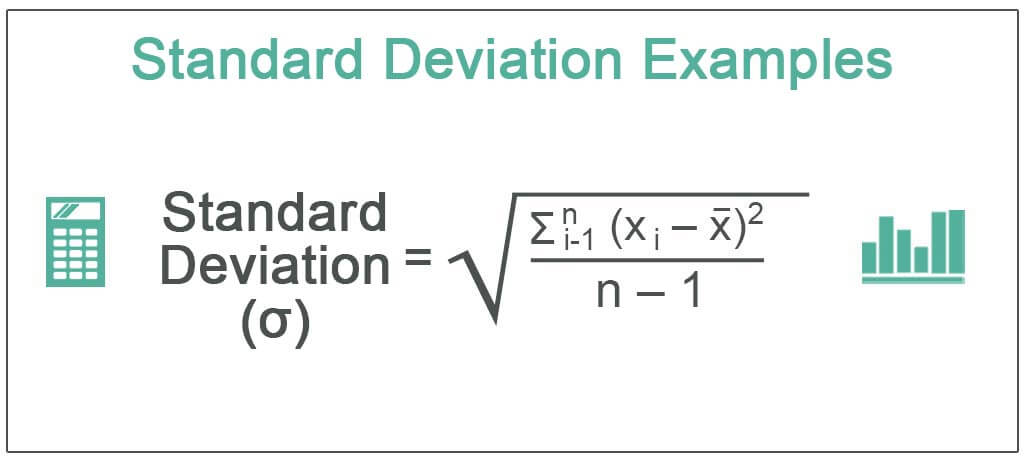

In [68]:
#when apply over sample before StandardScaler()
from imblearn.over_sampling import SMOTE

# Assuming you have your data in X1 and Y1

# Split the dataset into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.25, random_state=42)

# Apply SMOTE oversampling to the training data
sm = SMOTE(random_state=42)
X_smo1, y_smo1 = sm.fit_resample(X_train1, y_train1)

# Apply Standardization (z-score scaling) to the numerical columns
numerical_columns = X_smo1.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_smo1[numerical_columns] = scaler.fit_transform(X_smo1[numerical_columns])
X_test1[numerical_columns] = scaler.transform(X_test1[numerical_columns])

# Create and train your RandomForestClassifier
rf_classifier1 =DecisionTreeClassifier(random_state=42)
rf_classifier1.fit(X_smo1, y_smo1)

# Make predictions on the standardized test data
y_pred_train1 = rf_classifier1.predict(X_smo1)
y_pred_test1 = rf_classifier1.predict(X_test1)

# Calculate accuracy on the training and test sets
accuracy_train1 = accuracy_score(y_smo1, y_pred_train1)
accuracy_test1 = accuracy_score(y_test1, y_pred_test1)

print("Accuracy on Training Set:", accuracy_train1 * 100, "%")
print("Accuracy on Test Set:", accuracy_test1 * 100, "%")
print("over sample with StandardScaler")

Accuracy on Training Set: 100.0 %
Accuracy on Test Set: 87.92852287073904 %
over sample with StandardScaler


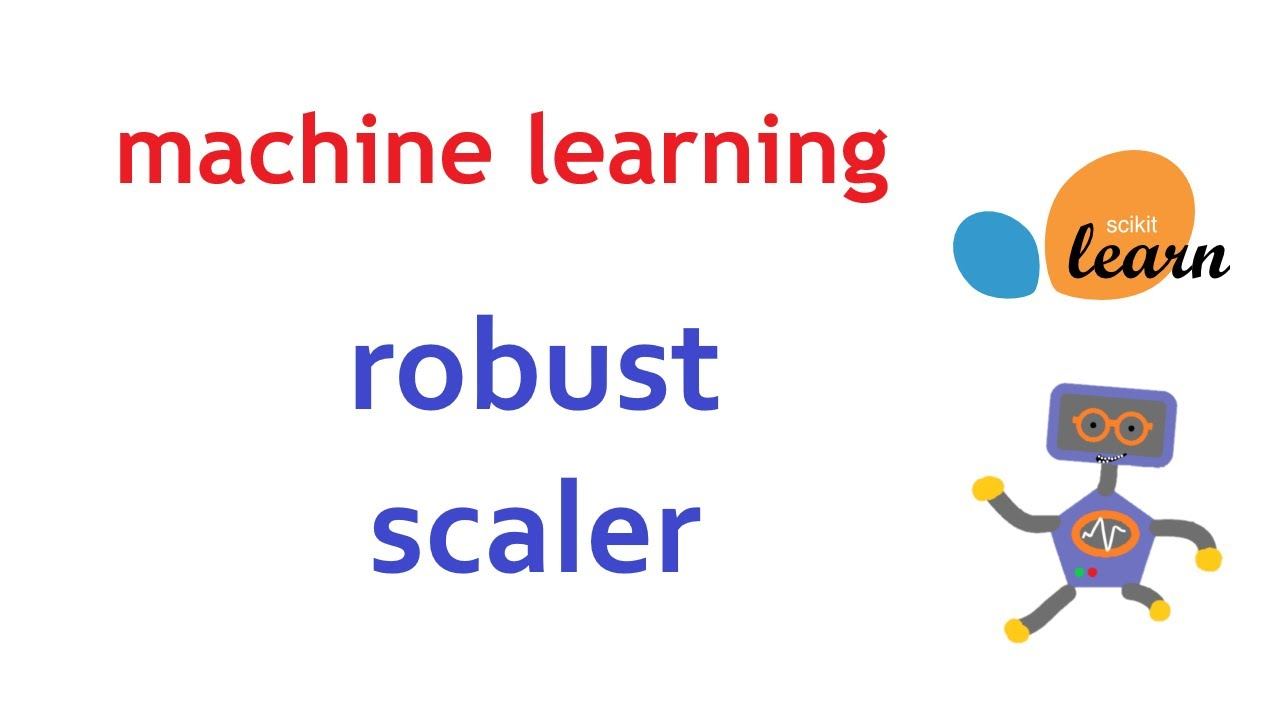

In [69]:
#Apply robust scaller........
from sklearn.preprocessing import RobustScaler
# Assuming you have your data in X1 and Y1

# Split the dataset into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.25, random_state=42)

# Apply SMOTE oversampling to the training data
sm = SMOTE(random_state=42)
X_smo1, y_smo1 = sm.fit_resample(X_train1, y_train1)

# Apply Robust Scaling to the numerical columns
numerical_columns = X_smo1.select_dtypes(include=['int64', 'float64']).columns
scaler = RobustScaler()
X_smo1[numerical_columns] = scaler.fit_transform(X_smo1[numerical_columns])
X_test1[numerical_columns] = scaler.transform(X_test1[numerical_columns])

# Create and train your RandomForestClassifier
rf_classifier1 = DecisionTreeClassifier(random_state=42)
rf_classifier1.fit(X_smo1, y_smo1)

# Make predictions on the standardized test data
y_pred_train1 = rf_classifier1.predict(X_smo1)
y_pred_test1 = rf_classifier1.predict(X_test1)

# Calculate accuracy on the training and test sets
accuracy_train1 = accuracy_score(y_smo1, y_pred_train1)
accuracy_test1 = accuracy_score(y_test1, y_pred_test1)

print("Accuracy on Training Set:", accuracy_train1 * 100, "%")
print("Accuracy on Test Set:", accuracy_test1 * 100, "%")
print("Oversample with Robust Scaler")


Accuracy on Training Set: 100.0 %
Accuracy on Test Set: 87.92852287073904 %
Oversample with Robust Scaler


**we will choose robust scaler beacuase
RobustScaler is a more suitable choice when dealing with data that has outliers or non-normal distributions, as it is less sensitive to extreme values.```**   😊

# The best preprocess "concolusion"

In [70]:
#****for_reading only*****
#the best preprocess
# Split the dataset into training and testing sets
#lencode data
le = LabelEncoder()
categorical_columns = [column for column in data_model.columns if data_model[column].dtype.name == 'object']
for column in categorical_columns:
    data_model[column] = le.fit_transform(data_model[column])

Y=data_model["y"]
X=data_model.drop(columns="y",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
sm = SMOTE(random_state=42)
X_smo, y_smo = sm.fit_resample(X_train, y_train)

 # Apply Robust Scaling to the numerical columns
numerical_columns = X_smo.select_dtypes(include=['int64', 'float64']).columns
scaler = RobustScaler()
X_smo[numerical_columns] = scaler.fit_transform(X_smo[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# our variable we will work on models part( X_smo,X_test,y_smo,y_test) ,you can use it in model part

# Models part....

*First apply SVM*

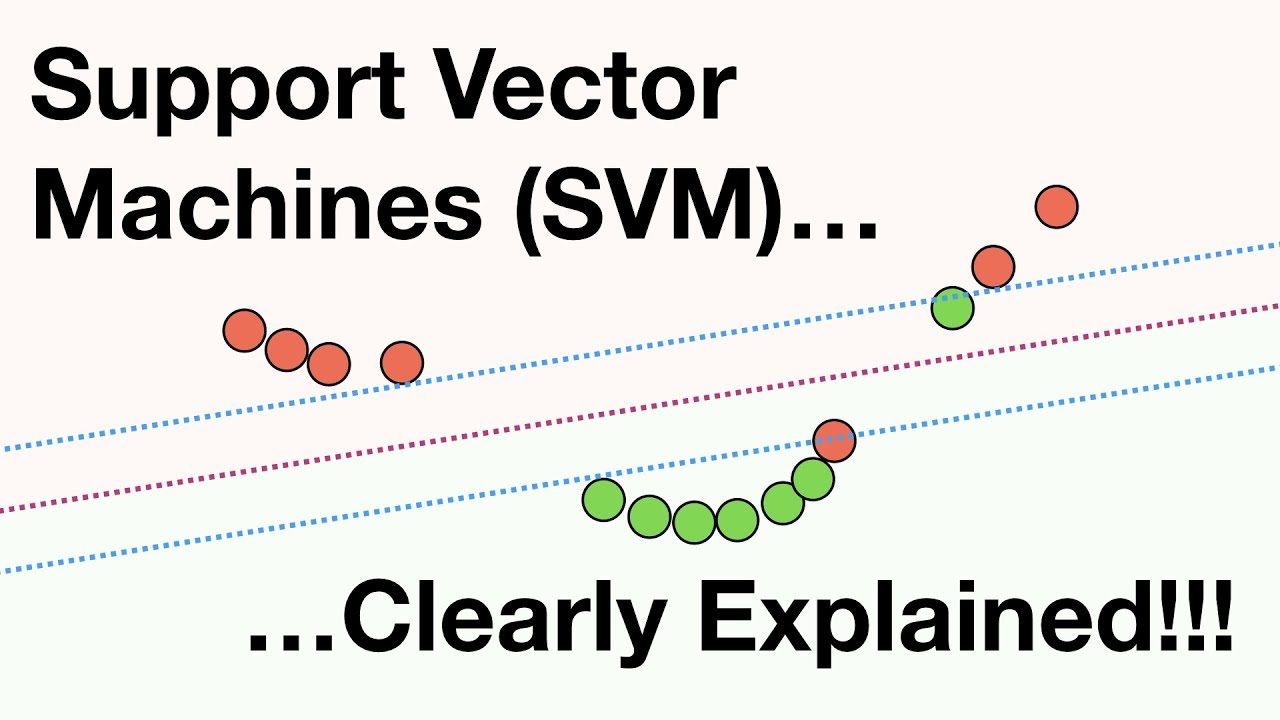

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Helper function for plotting confusion matrix
def plot_confusion_matrix(cm, cmap='Blues'):
    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title("Confusion Matrix")
    plt.colorbar()
    classes = ['Class 0', 'Class 1']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

Second: Apply KNN

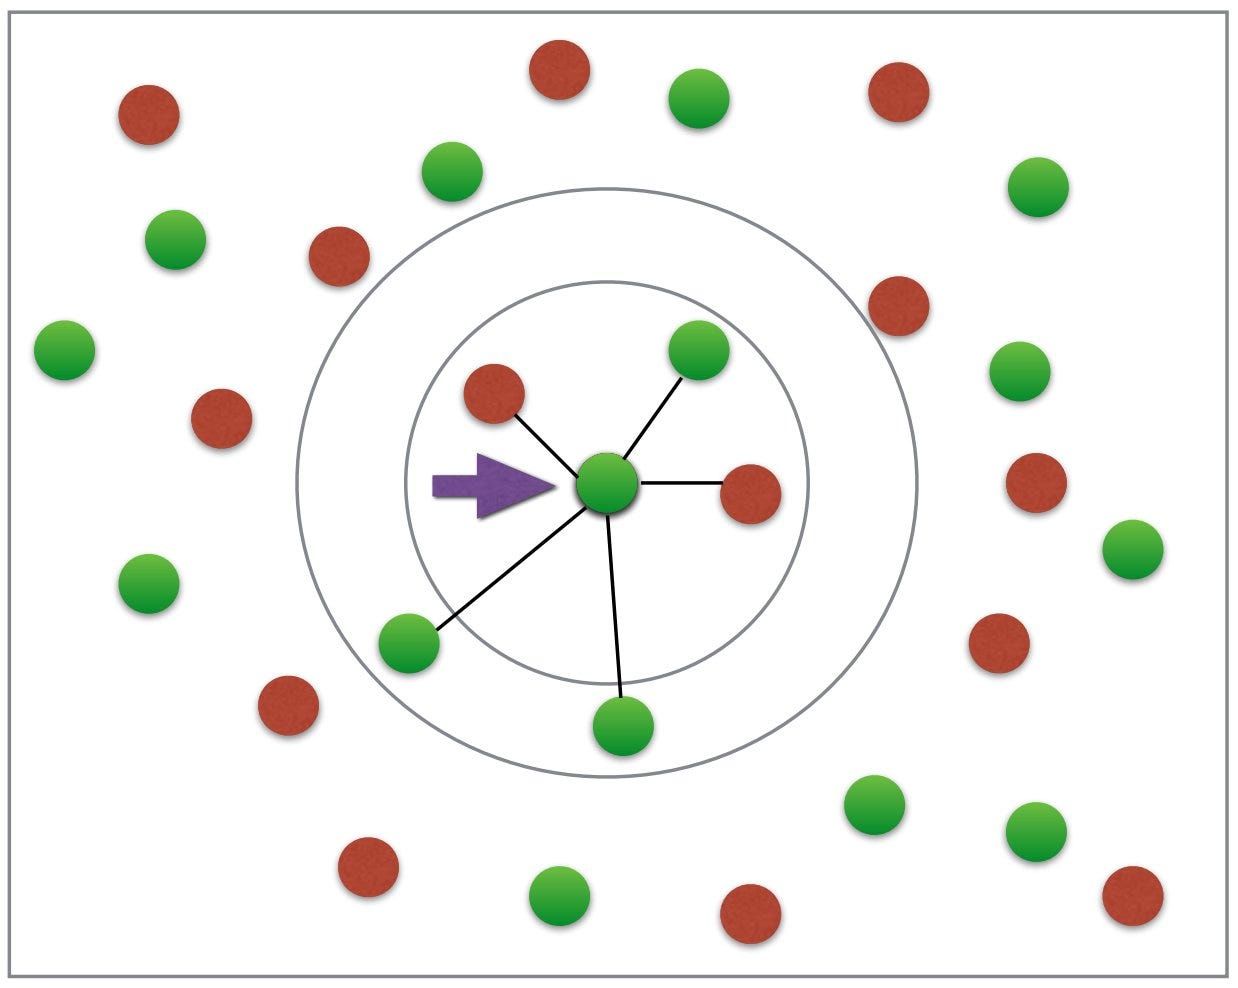


--- KNN Results ---
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 1}
Train Accuracy: 100.0 %
Test Accuracy: 87.18073225211226 %


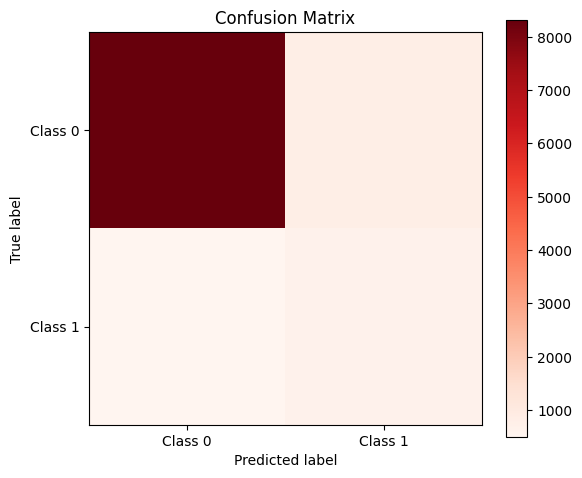

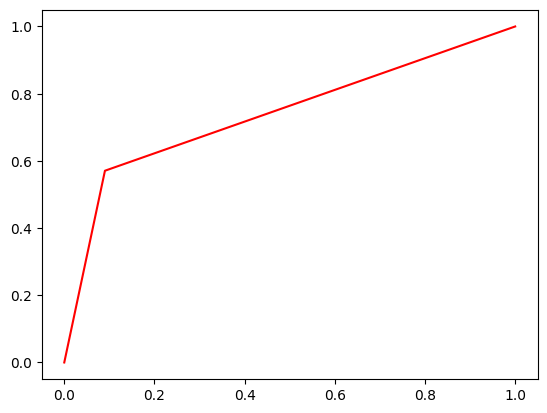

In [72]:
# -------------------- KNN --------------------
knn_param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan']
}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_param_grid, scoring='accuracy', cv=5)
knn_grid.fit(X_smo, y_smo)
best_knn = knn_grid.best_estimator_

y_pred_knn = best_knn.predict(X_test)
y_pred_train_knn = best_knn.predict(X_smo)
print("\n--- KNN Results ---")
print("Best Hyperparameters:", knn_grid.best_params_)
print("Train Accuracy:", accuracy_score(y_smo, y_pred_train_knn) * 100, "%")
print("Test Accuracy:", accuracy_score(y_test, y_pred_knn) * 100, "%")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_knn), cmap='Reds')
y_pred_proba_knn = best_knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_knn)
auc = roc_auc_score(y_test, y_pred_proba_knn)
plt.plot(fpr, tpr, label=f"KNN (AUC = {auc:.2f})", color='red')

# Decision Tree

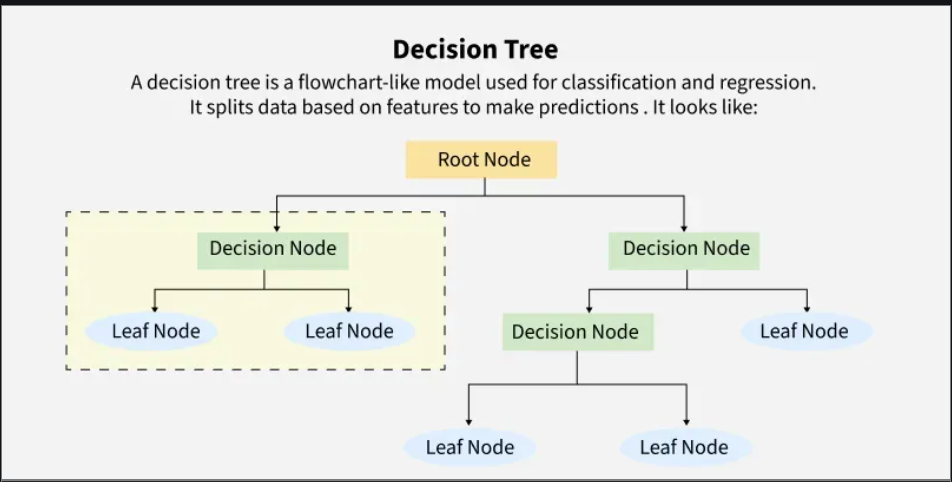


--- Decision Tree Results ---
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train Accuracy: 99.45810830535689 %
Test Accuracy: 88.21986986500923 %


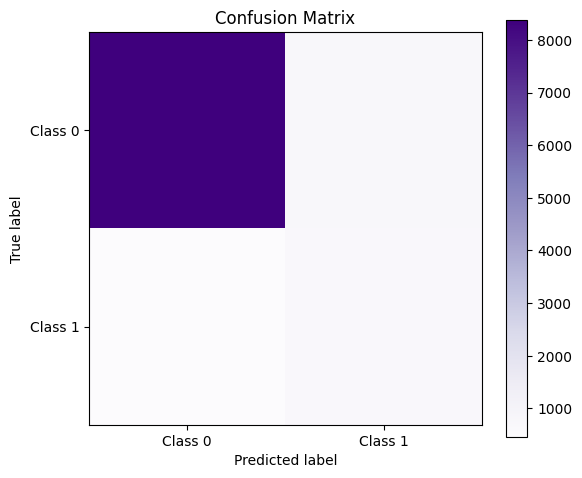

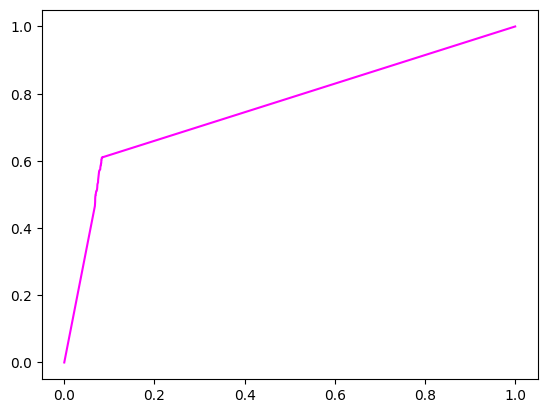

In [73]:
# -------------------- Decision Tree --------------------
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt, dt_param_grid, scoring='accuracy', cv=5)
dt_grid.fit(X_smo, y_smo)
best_dt = dt_grid.best_estimator_

y_pred_dt = best_dt.predict(X_test)
y_pred_train_dt = best_dt.predict(X_smo)
print("\n--- Decision Tree Results ---")
print("Best Hyperparameters:", dt_grid.best_params_)
print("Train Accuracy:", accuracy_score(y_smo, y_pred_train_dt) * 100, "%")
print("Test Accuracy:", accuracy_score(y_test, y_pred_dt) * 100, "%")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_dt), cmap='Purples')
y_pred_proba_dt = best_dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_dt)
auc = roc_auc_score(y_test, y_pred_proba_dt)
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {auc:.2f})", color='magenta')


** Foutrh :Apply random forest**

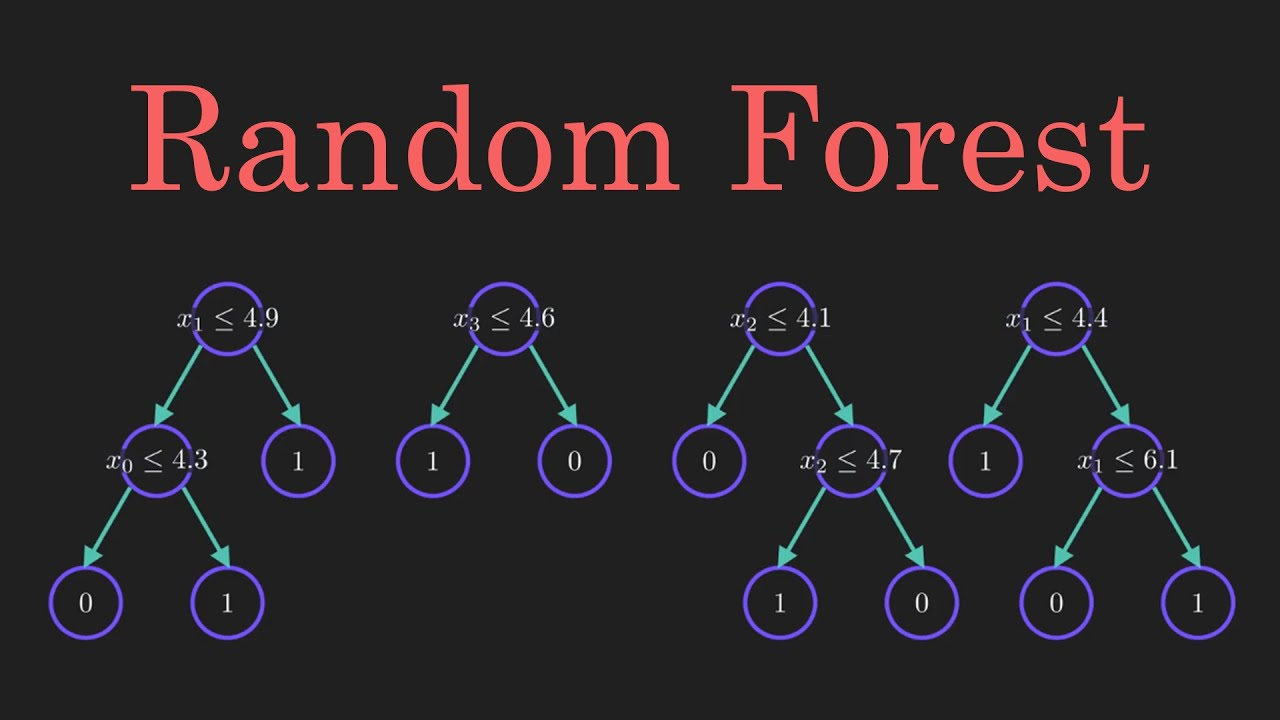


--- Random Forest Results ---
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Train Accuracy: 99.63326521675667 %
Test Accuracy: 90.50208798679226 %


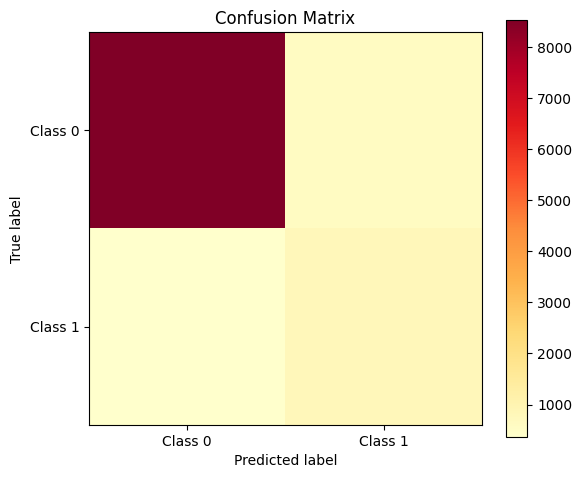

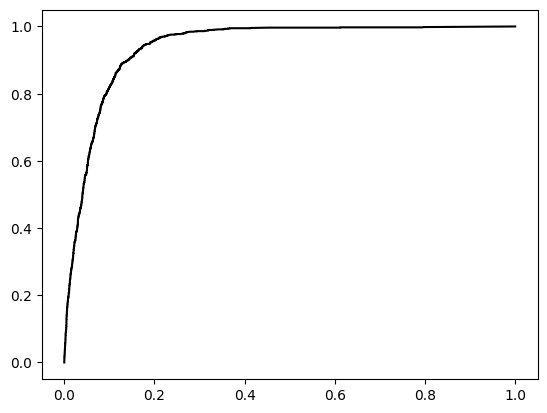

In [74]:
# -------------------- Random Forest --------------------
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [20],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_param_grid, scoring='accuracy', cv=5)
rf_grid.fit(X_smo, y_smo)
best_rf = rf_grid.best_estimator_

y_pred_rf = best_rf.predict(X_test)
y_pred_train_rf = best_rf.predict(X_smo)
print("\n--- Random Forest Results ---")
print("Best Hyperparameters:", rf_grid.best_params_)
print("Train Accuracy:", accuracy_score(y_smo, y_pred_train_rf) * 100, "%")
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf) * 100, "%")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_rf), cmap='YlOrRd')
y_pred_proba_rf = best_rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_rf)
auc = roc_auc_score(y_test, y_pred_proba_rf)
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc:.2f})", color='black')


<ipython-input-79-854a56299529>:6: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



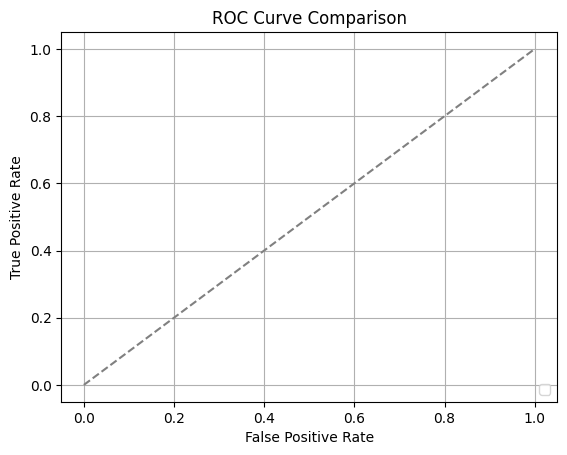

In [79]:
# -------------------- ROC Summary --------------------
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid()
plt.show()

 ⭕**Conclusion**

 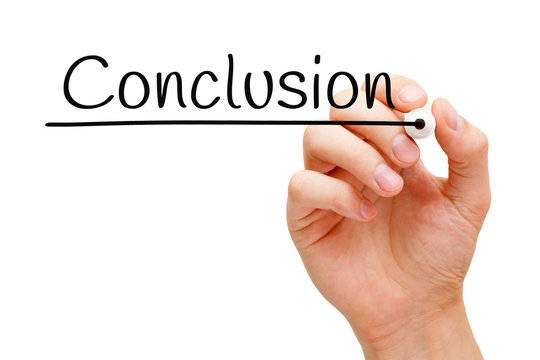

The best accuracy is Random forest with  90.5% accuracy  ✅
And the degree of a model's ability to differentiate between classes. is High ↗


# THANK YOU 💗